# Lending Club Case Study

In [1]:
# Importing necessary libraries

import numpy as np
#print('numpy version\t:', np.__version__)
import pandas as pd
#print('pandas version\t:', pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme()
#print('seaborn version\t:', sns.__version__)
from scipy import stats

import os

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows',150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, they will be ignored.

import random

## Visual examination of data

In [2]:
# Reading the provided data file of loan information
# The data dictionary is used to manually understand the various features of data
df = pd.read_csv('loan.csv')

In [3]:
#Get some insights from the data
# We print summary information of all attributes
df.info()
df.agg(['count','size','nunique','dtypes'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
size,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717
nunique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
dtypes,int64,int64,int64,int64,float64,object,object,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,float64,int64,object,int64,float64,float64,int64,int64,int64,object,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,int64,object,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [4]:
# Visually examining the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,NaN,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,NaN,1,INDIVIDUAL,N

## Data Cleaning
<ul>
<li>We remove the columns with greater than 50% null values.</li>
<li>Further, we remove the constant features which serve no purpose in prediction.</li>
<li>Next, we remove duplicate features.</li>
<li>Also, we search for any duplicate rows and drop them.</li>
<li>Finally, we drop rows having null values.</li>
</ul>

<B>Note:</B> We are only interested in two states of the target variable "loan status",i.e "Fully Paid" and "Charged Off" and remove the rows which have value "current" for this variable.

In [5]:
#Let us start with the target feature "loan_status" and view its composition
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [6]:
#We are only interested in the examples "Fully Paid" and "Charged Off". So, we select the data-set for these two classes only and "current" examples may be dropped.
df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off']))]
df.shape

(38577, 111)

In [7]:
# Find the percentage of missing values of the columns
# funcion to get null value
def null_percentage(dataframe):
    result = round(df.isnull().sum()/len(df.index)*100,2)
    return result
NA_col = null_percentage(df)

# Get the column with null values more than n%
n = 50
NA_col_n = NA_col[NA_col>n]
print("Number of columns having null value more than 50% :", len(NA_col_n.index))
print(NA_col_n)

Number of columns having null value more than 50% : 57
mths_since_last_delinq            64.5600
mths_since_last_record            92.9000
next_pymnt_d                     100.0000
mths_since_last_major_derog      100.0000
annual_inc_joint                 100.0000
dti_joint                        100.0000
verification_status_joint        100.0000
tot_coll_amt                     100.0000
tot_cur_bal                      100.0000
open_acc_6m                      100.0000
open_il_6m                       100.0000
open_il_12m                      100.0000
open_il_24m                      100.0000
mths_since_rcnt_il               100.0000
total_bal_il                     100.0000
il_util                          100.0000
open_rv_12m                      100.0000
open_rv_24m                      100.0000
max_bal_bc                       100.0000
all_util                         100.0000
total_rev_hi_lim                 100.0000
inq_fi                           100.0000
total_cu_tl          

In [8]:
# We remove these columns having null percentage more than 50%.
df = df.drop(NA_col_n.index, axis = 1)
df.shape

(38577, 54)

In [9]:
#Find_constant_features with < 2 unique values. If so, the features are added to the constant feature list. We can also find out constant feature looking at the variance or standard deviation. If the feature has zero variance or standard deviation, we are sure that the feature has single unique value. The print statement shows that five features have single unique value. So we remove them using “inplace” option true.
def constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = constant_features(df)
print(len(const_features),const_features)
df.drop(const_features, axis = 1, inplace = True)
df.shape

8 ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


(38577, 46)

In [10]:
#Remove duplicate features having the same value in multiple features with the same/different name.
def duplicate_features(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    duplicate = []
    for t, v in groups.items():
        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)
    for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    duplicate.append(cs[i])
                    break
    return duplicate
duplicate_columns = duplicate_features(df)
print(duplicate_columns)


[]


In [11]:
# The following features still have null values
NA_col = null_percentage(df)
n = 0
NA_col_n = NA_col[NA_col>n]
print("The following features still have null values: \n")
print(NA_col_n)


The following features still have null values: 

emp_title                     6.1900
emp_length                    2.6800
desc                         32.4700
title                         0.0300
revol_util                    0.1300
last_pymnt_d                  0.1800
last_credit_pull_d            0.0100
collections_12_mths_ex_med    0.1500
chargeoff_within_12_mths      0.1500
pub_rec_bankruptcies          1.8100
tax_liens                     0.1000
dtype: float64


In [12]:
# We will manually check the relevancy of non-zero null columns
# We found that the following features: 
# "desc","emp_title","tax_liens","last_pymnt_d", "collections_12_mths_ex_med",
# "chargeoff_within_12_mths","revol_util","last_credit_pull_d"
# seem to have no relevance for the target feature and are being dropped.

Irr_Feat_miss_vals =["desc","emp_title","tax_liens","last_pymnt_d","collections_12_mths_ex_med","chargeoff_within_12_mths","revol_util","last_credit_pull_d"]
print(len(Irr_Feat_miss_vals)) 
df = df.drop(Irr_Feat_miss_vals,axis =1) 
df.shape

8


(38577, 38)

In [13]:
# The amount of data lost by removing the null rows < 5% only hence we've decided to drop the same.

df = df[df.isnull().sum(axis=1)<1]
print(df.shape)
print("The data at this point has no null-values.")

(36837, 38)
The data at this point has no null-values.


### Manually examining remaining features for their relevancy to the target feature

In [14]:
# We have manually examined all features and determined that the following ones have no relevance to the target.
# Features like, id, member_id, url etc. are obviously not relevant. And others like total_pymnt, last_pymnt_amnt
# etc. are unavailable at the time of loan application.
# Irrelevant_Features:
# "id","member_id","url","title", "zip_code", "earliest_cr_line","total_pymnt", "total_pymnt_inv",
# "total_rec_prncp","total_rec_int","total_rec_late_fee", "recoveries","collection_recovery_fee",
# "last_pymnt_amnt"

Irrelevant_Features =["id","member_id","url","title", "zip_code", "earliest_cr_line","total_pymnt",
"total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
"recoveries","collection_recovery_fee","last_pymnt_amnt"]
print(len(Irrelevant_Features))
df = df.drop(Irrelevant_Features, axis = 1)
df.shape

14


(36837, 24)

# Univariate & Segmented Univariate Analysis

The features are examined using univariate and segmented univariate analysis.

In [15]:
# The following function draws two plots to visualize a feature in two ways as described below.

#The function accepts two parameters; the first one is the feature name and the second one is the boolean variable 
#whether the feature is continuous or categorical. If the feature is continuous then function plot two subplots:
#(1) the distribution of the feature and (2) the two boxplots based on loan_status class. Otherwise, if it is
#categorical, then the first subplot is count plot and the second subplot is based on the loan_status classes.

def visualize_feature(column_name, continuous):
    """
    This function plots two diagrams for each feature:
    a. A distribution plot or a count plot to show frequency.
    b. A boxplot or count plot split over the target attribute for visualizing segmented distribution.
    - column_name is the variable name in the dataframe
    - full_name is the variable name
    - continuous is True if the variable is continuous, else False
    """
    f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,8), dpi=90)
    
    # Plot a. showing frequency
    if continuous:
        sns.distplot(df.loc[df[column_name].notnull(), column_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[column_name], order=sorted(df[column_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Count')
    ax1.set_title(column_name)
    plt.xticks(rotation = 90)
    # Plot for visualizing segmented distribution over loan status
    if continuous:
        sns.boxplot(x=column_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(column_name + ' by Loan Status')
    else:
        data = df.groupby(column_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = column_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        #plt.xticks(rotation = 90)
    ax2.set_xlabel(column_name)
    
    plt.tight_layout()

In [16]:
# The following remaining features and some derived metrics are subjected to univariate analysis and segmented analys.
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,1,3,0,13648,9,0.0000
1,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,GA,1.0000,0,5,3,0,1687,4,0.0000
2,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.7200,0,2,2,0,2956,10,0.0000
3,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,CA,20.0000,0,1,10,0,5598,37,0.0000
5,5000,5000,5000.0000,36 months,7.90%,156.4600,A,A4,3 years,RENT,36000.0000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.2000,0,3,9,0,7963,12,0.0000


## Features 1, 2 & 3: loan amount, funded amount & funded amount invested:
These features are similar. It seems higher values of each of these features carry a greater risk of default.


In [17]:
# 1.Feature: loan_amnt
len(df.loan_amnt.value_counts())

856

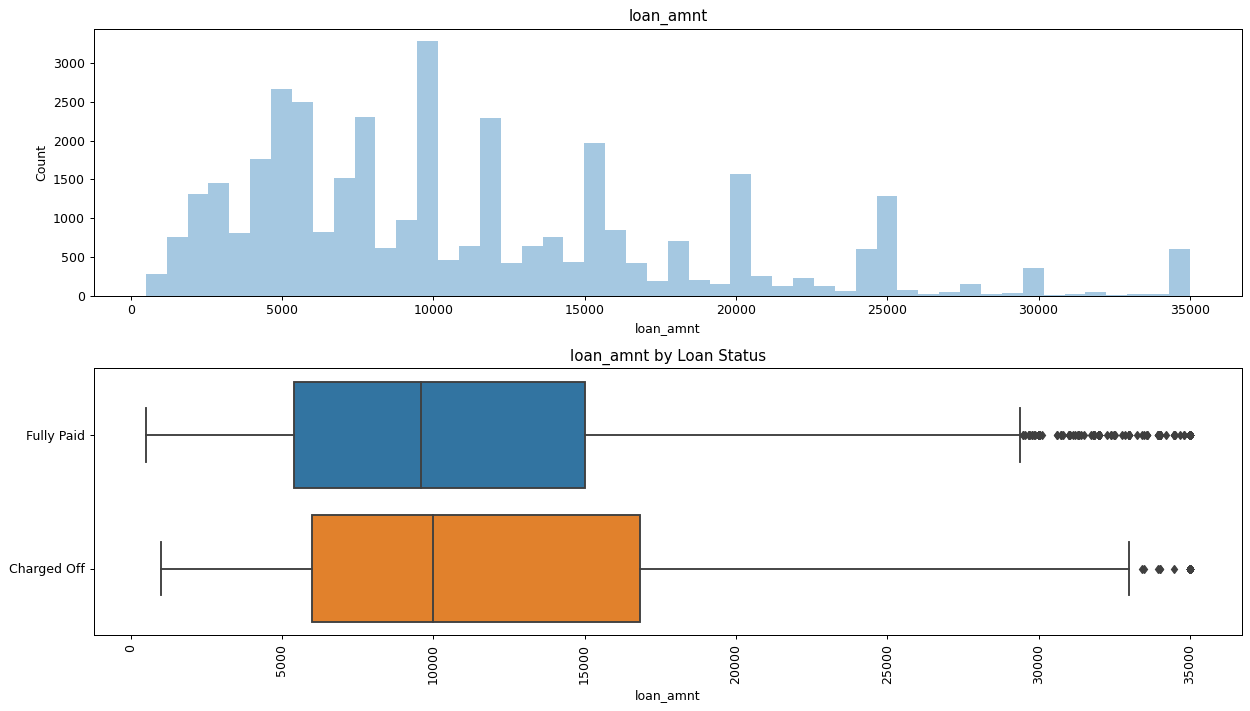

In [18]:
visualize_feature('loan_amnt', True)

#It seems that higher loan amounts are more likely to be charged off.
#It looks like all loans are not unique. Some specific amount appear 
#several times. It may be the reason the company has some range or certain amounts to lend.

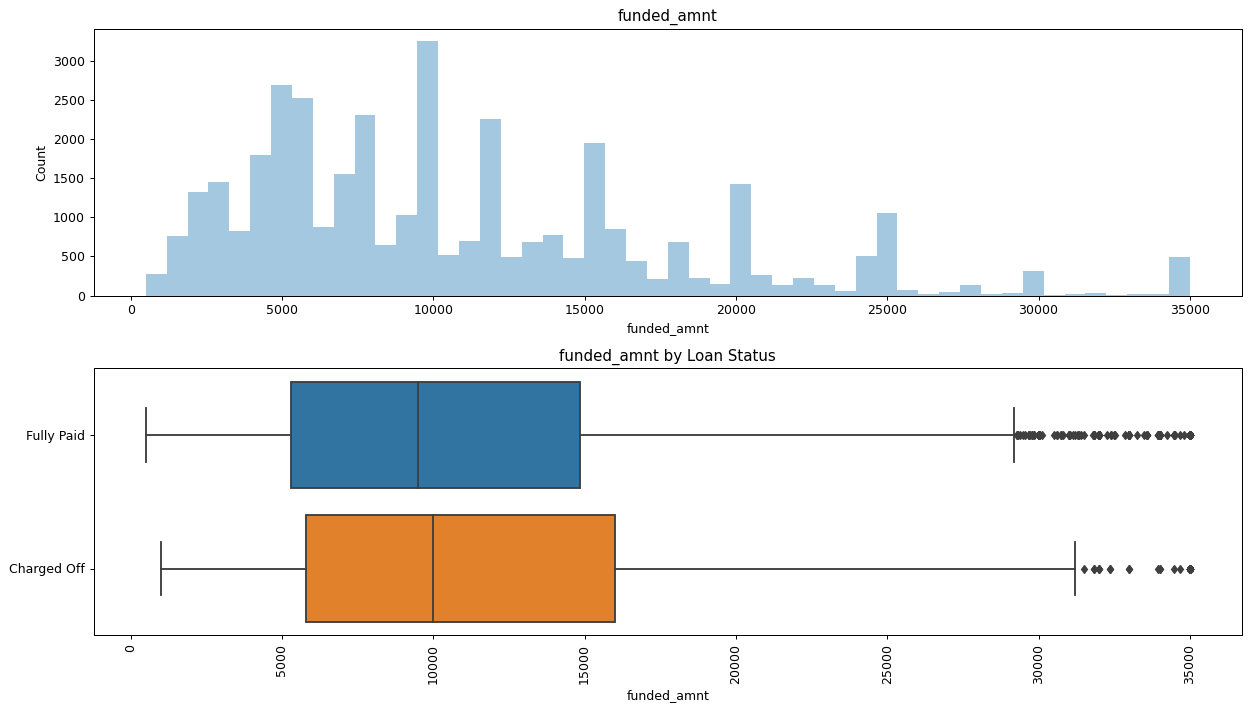

In [19]:
# 2.Feature: funded_amnt

visualize_feature('funded_amnt', True)

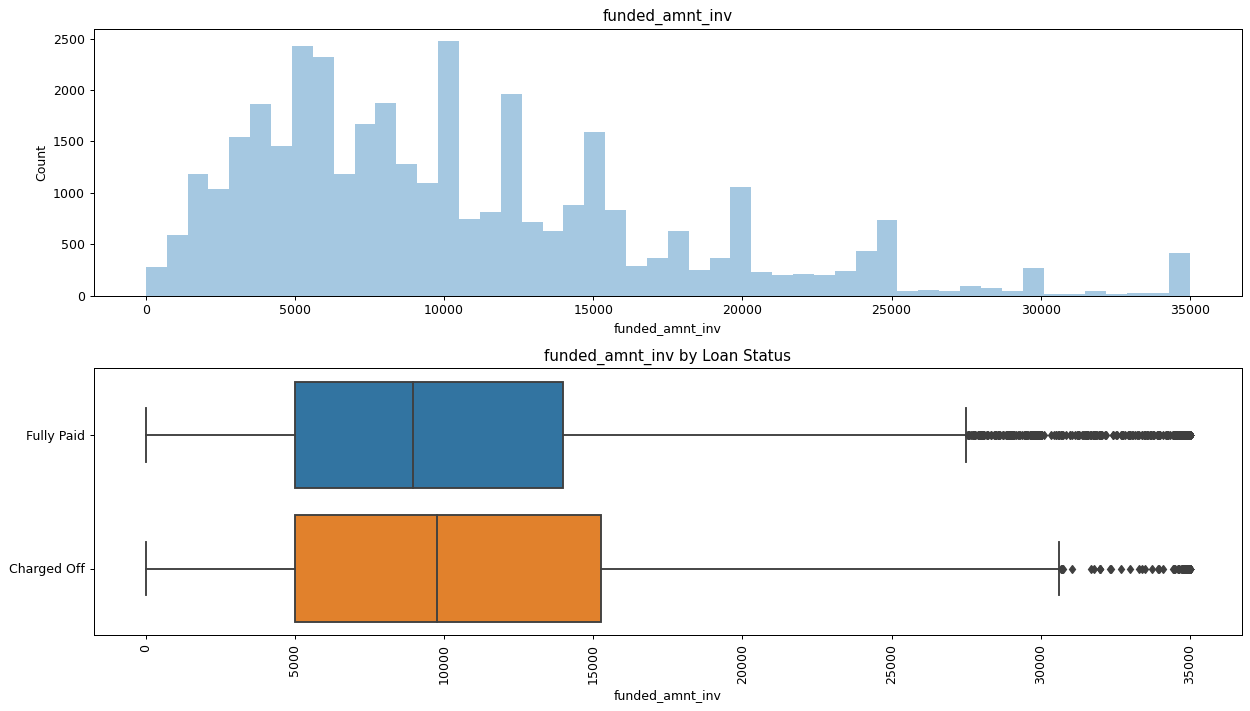

In [20]:
#3.Feature: funded_amnt_inv

visualize_feature('funded_amnt_inv', True)

## Feature 4: Term
There are only two terms, 36 months and 60 months. The long term loans have a higher tendency of default.

In [21]:
#4.Feature: term

df.term = df.term.str.replace('months', '').astype(np.int)
df.term.value_counts()

36    27583
60     9254
Name: term, dtype: int64

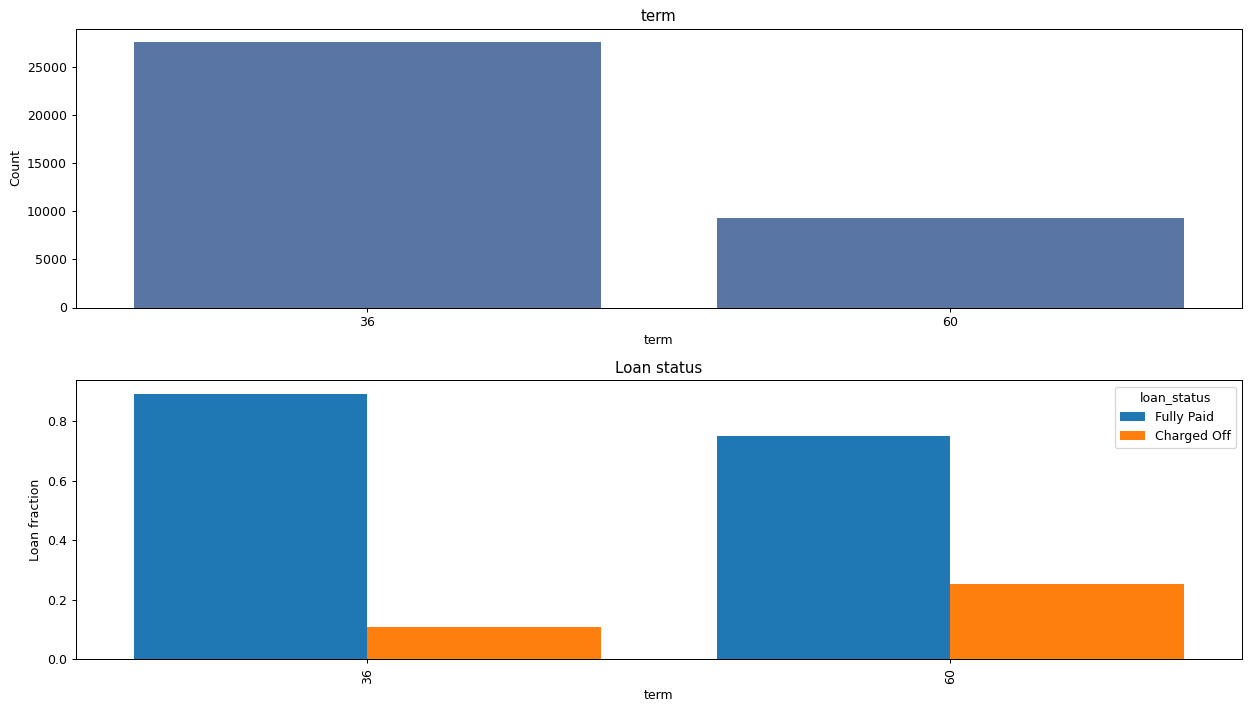

In [22]:
visualize_feature('term', False)

# About 0ne-third take the long term loans but have about double Charged Off fraction.

## Feature 5: Interest Rate
It appears that applicants who were paying higher interest rates have greater tendency for default.

In [23]:
#5. Feature: int_rate

df.int_rate = df.int_rate.str.replace('%', '').astype(np.float32)
len(df.int_rate.value_counts())

336

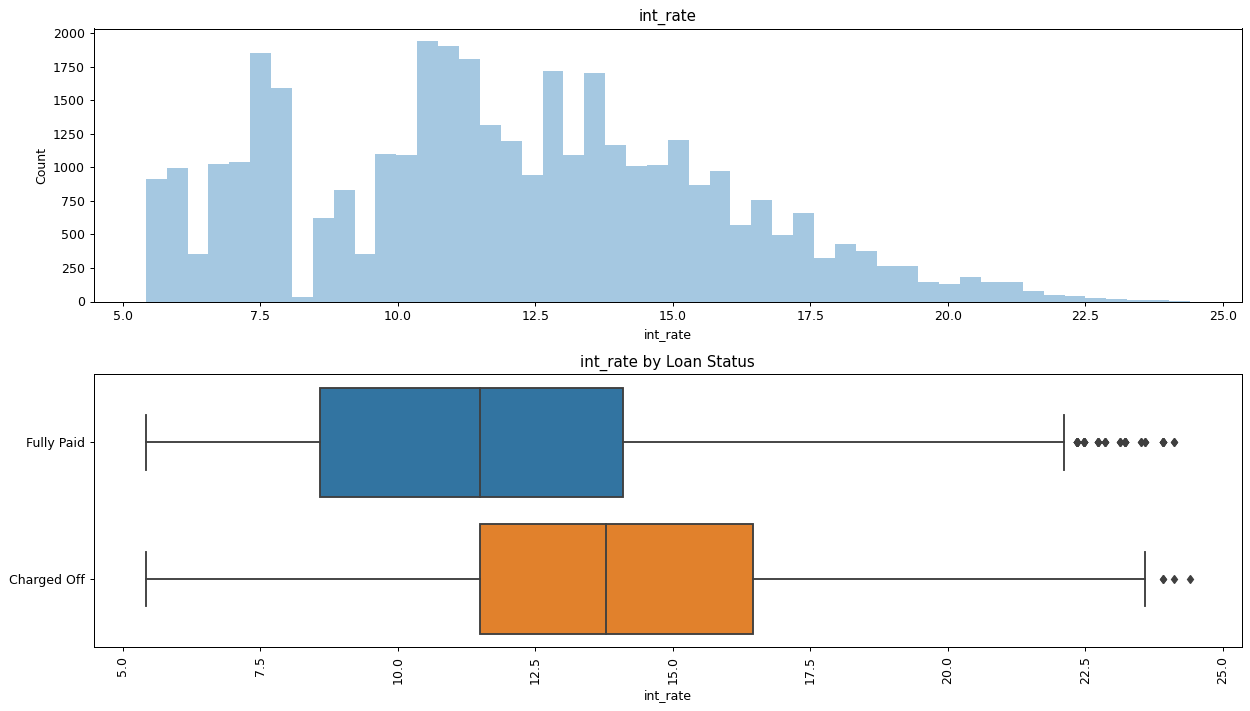

In [24]:
visualize_feature('int_rate', True)

#It seems applicants who could not afford to pay back and eventually 
#were charged off had to pay a higher interest rate.

## Feature 6: Installment
A higher installment amount appears to increase the tendency of default.

In [25]:
#6. Feature:installment

len(df. installment.value_counts())

14404

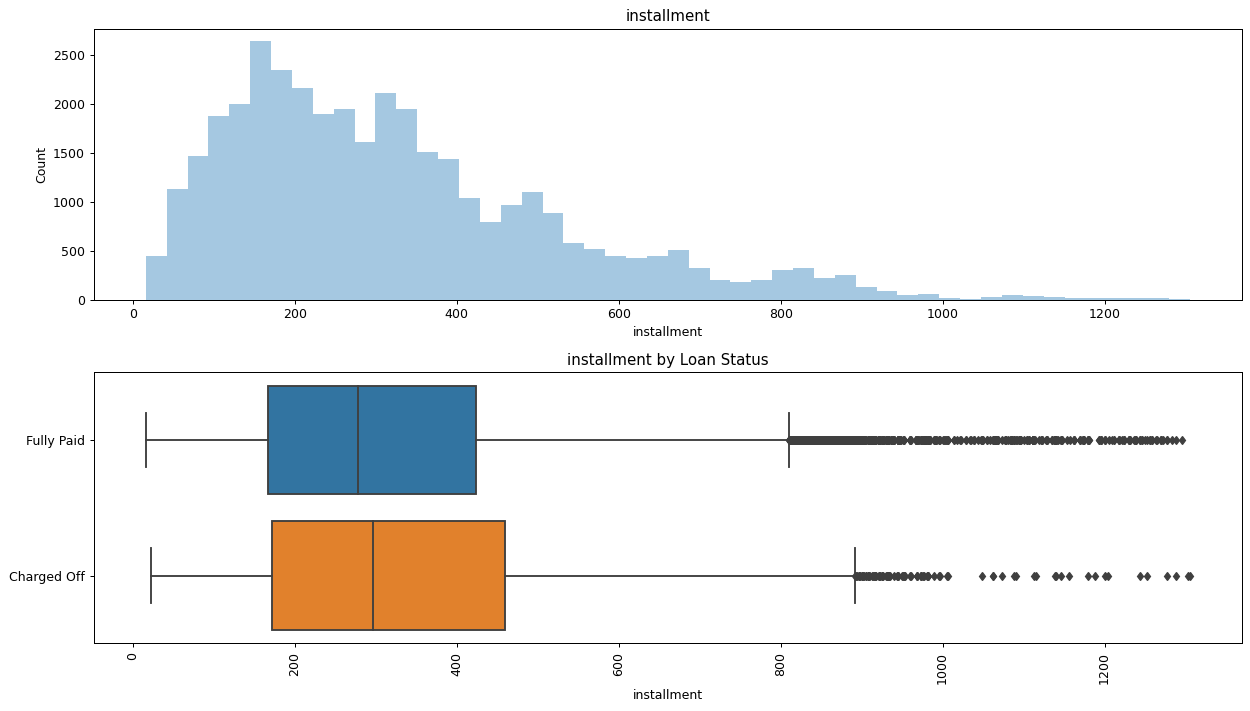

In [26]:
visualize_feature('installment', True)

# It seems there the installment amount has little effect on charge off. 

## Features 7 & 8: Grade & Sub-grade
Grade and sub-grade have similar distribution and relation with loan status. The lower grade loans (F-G) have a higher chance of default. The sub_grade carries more information. These grades are assigned by financial institutions based on their assessment of the quality of the loan so they are the best predictors.

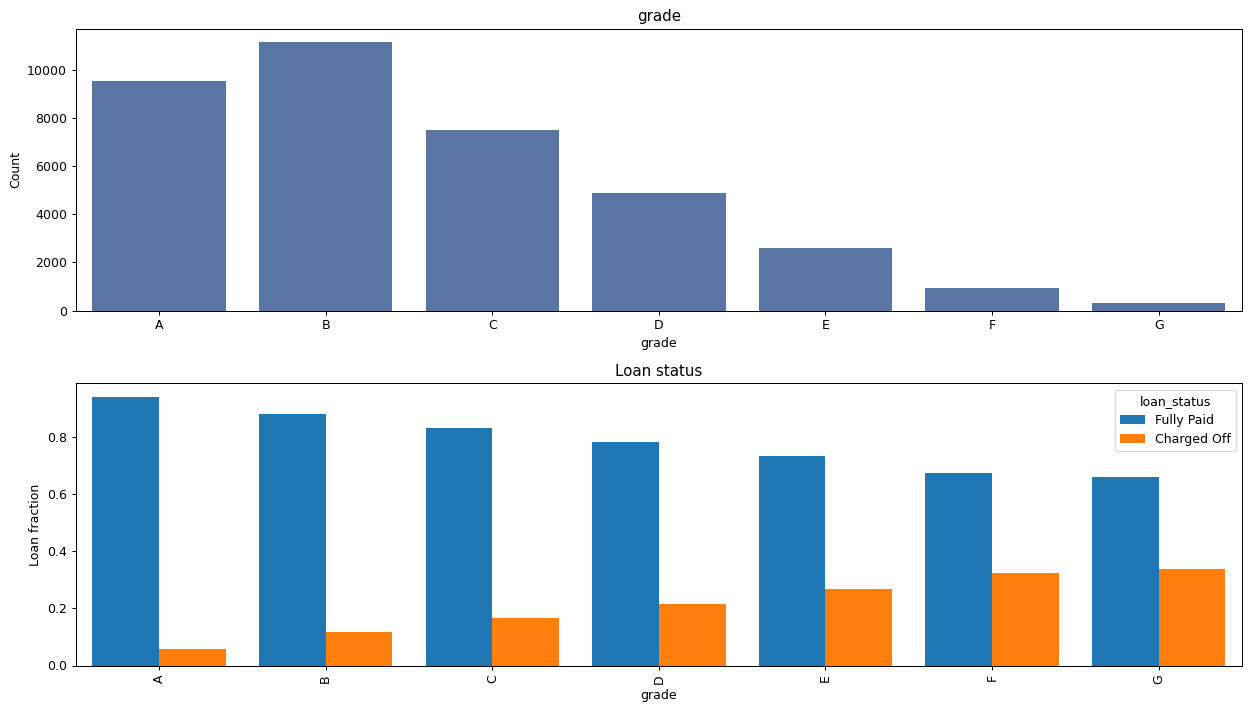

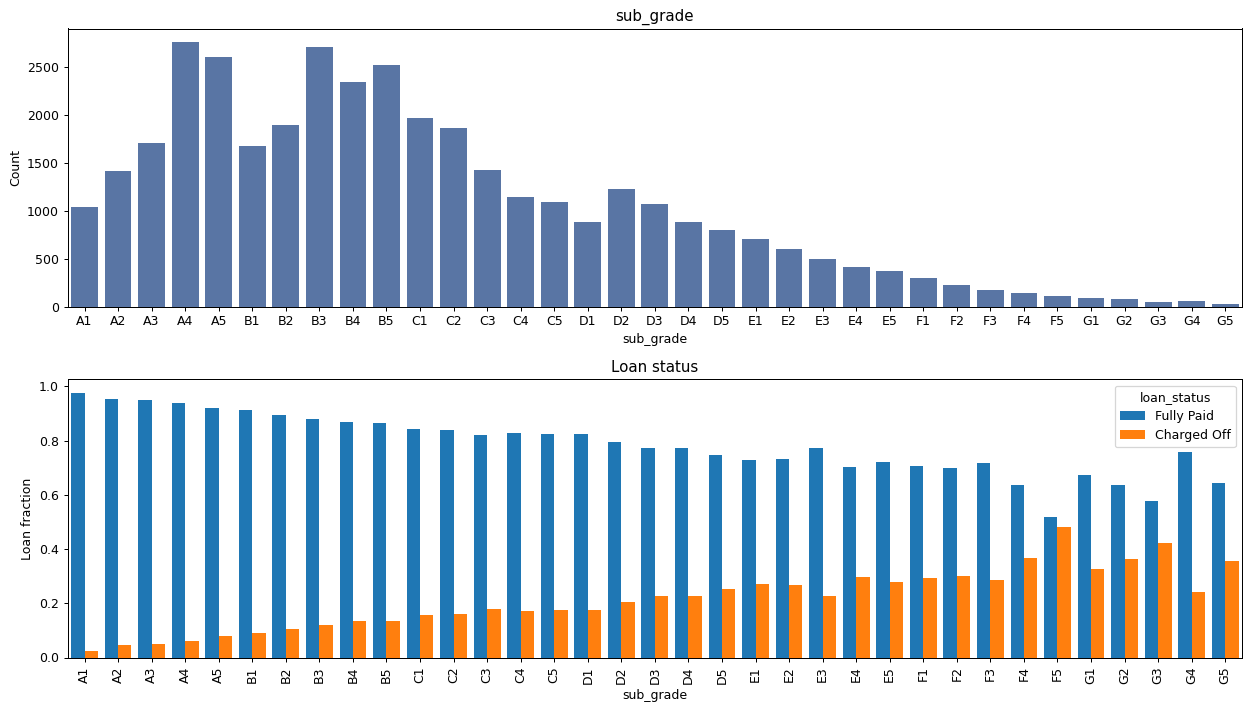

In [27]:
#7,8. Features: grade, sub_grade

visualize_feature('grade', False)
visualize_feature('sub_grade', False)

#It seems that grade and sub_grade have similar shape and relation with 
#loan status. In this case, The sub_grade carries more information and 
#hence grade may be dropped.

## Feature 9: Employment length
The distribution is shown by merging category < 1 year with 1 year. The people with over 10 years experience
have the highest frequency of taking loans. From the second plot we see that emp_length is not a strong predictor and has little relationship with the loan status.

In [28]:
#9.Feature:emp_length
df.emp_length.value_counts()


10+ years    8368
< 1 year     4340
2 years      4207
3 years      3951
4 years      3295
5 years      3159
1 year       3076
6 years      2135
7 years      1688
8 years      1410
9 years      1208
Name: emp_length, dtype: int64

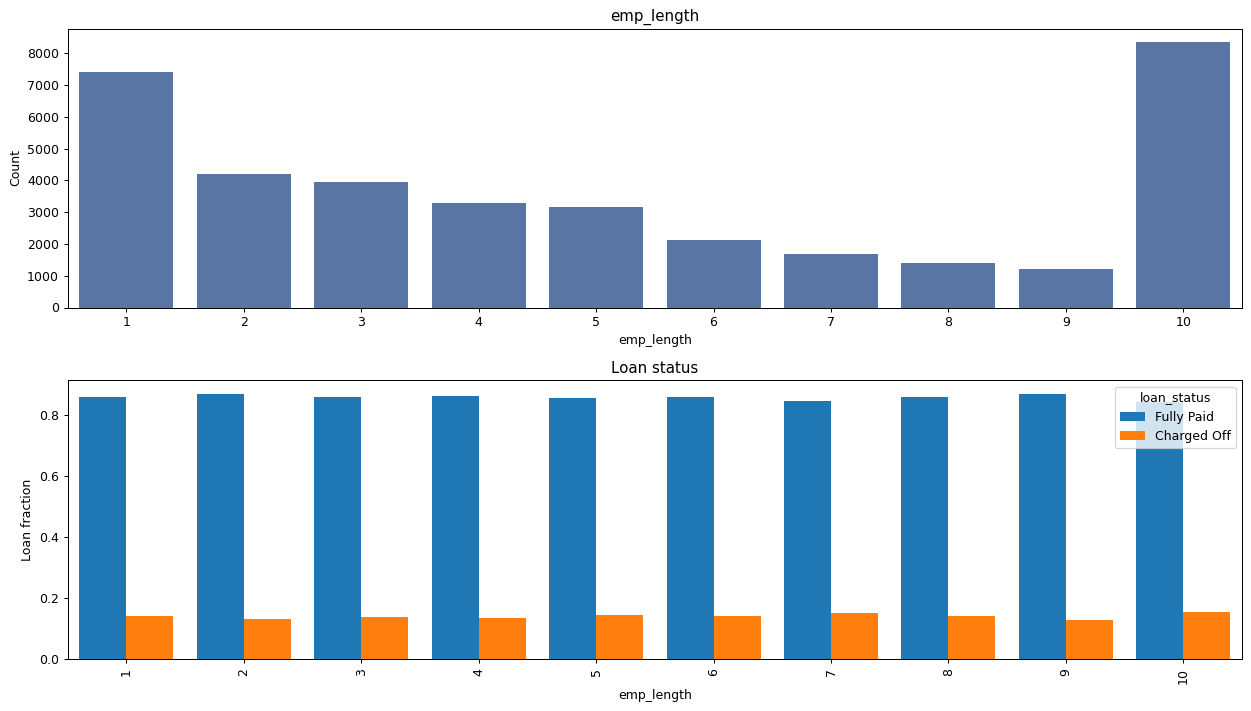

In [29]:
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
visualize_feature('emp_length', False)
#The distribution is shown by merging category < 1 year with as 1 year. The people with over 10 years experience
#have the highest frequency of taking loans.

## Feature 10: Home ownership
The proportion of people taking loan for other purposes is very small but the fraction who default is comparatively high.   

In [30]:
#10.Feature:home_ownership

df.home_ownership.value_counts()

RENT        17694
MORTGAGE    16340
OWN          2705
OTHER          98
Name: home_ownership, dtype: int64

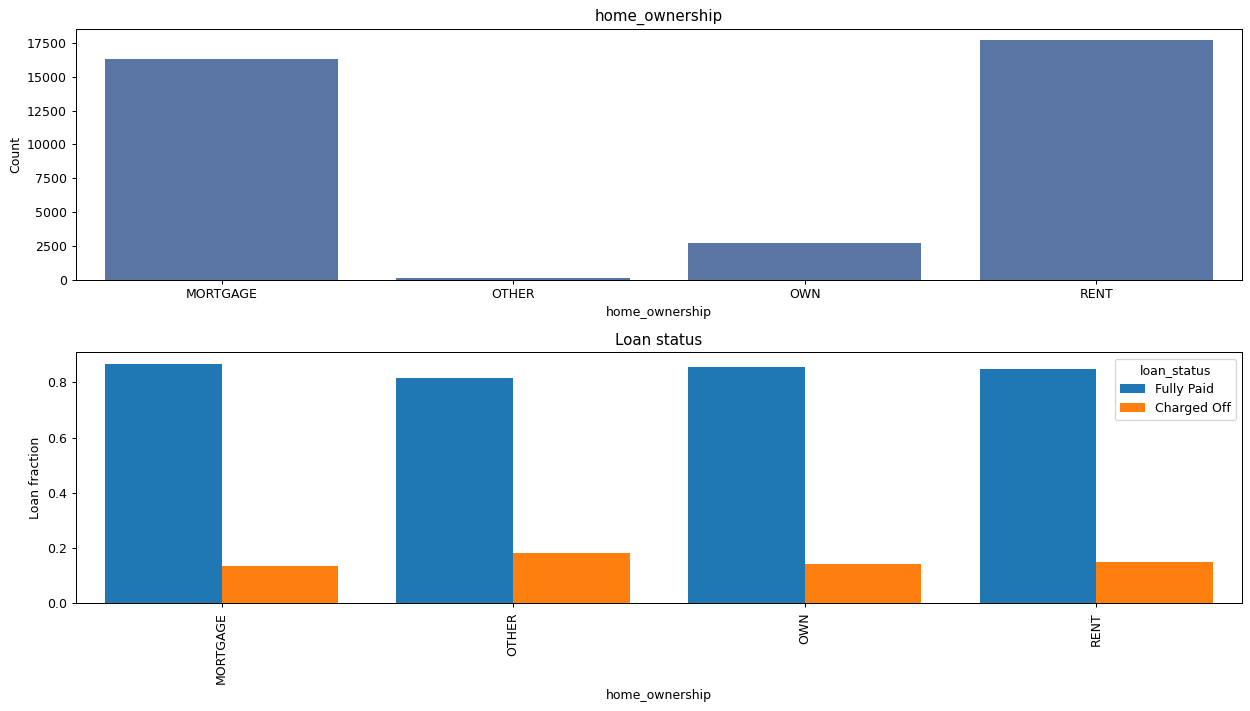

In [31]:
visualize_feature('home_ownership', False)

#The proportion of people taking loan for other purposes is negligible but Charged Off fraction is comparatively
#high.  

## Feature 11: Annual Income
Annual income alone does not seem to predict any tendency. Some derived features are discussed later. 

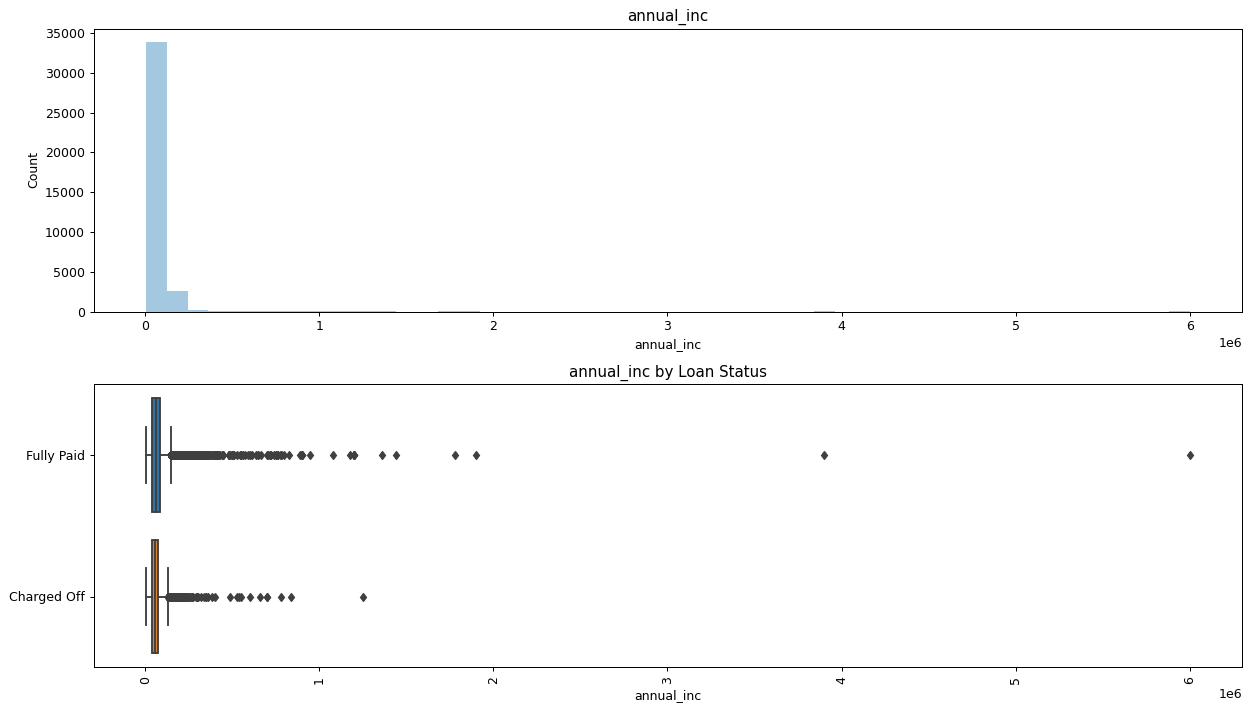

In [32]:
#11. Feature: annual_inc
df.annual_inc.value_counts()    
visualize_feature('annual_inc', True)

#annual_income alone does not seem to predict any tendency. Some derived features using this feature are 
#discussed later. 

## Feature 12: Verification status
The applicants whose source was verified are more likely to default which is a somewhat surprising!

In [33]:
#12. Feature:verification_status

df.verification_status.value_counts()

Not Verified       15578
Verified           11769
Source Verified     9490
Name: verification_status, dtype: int64

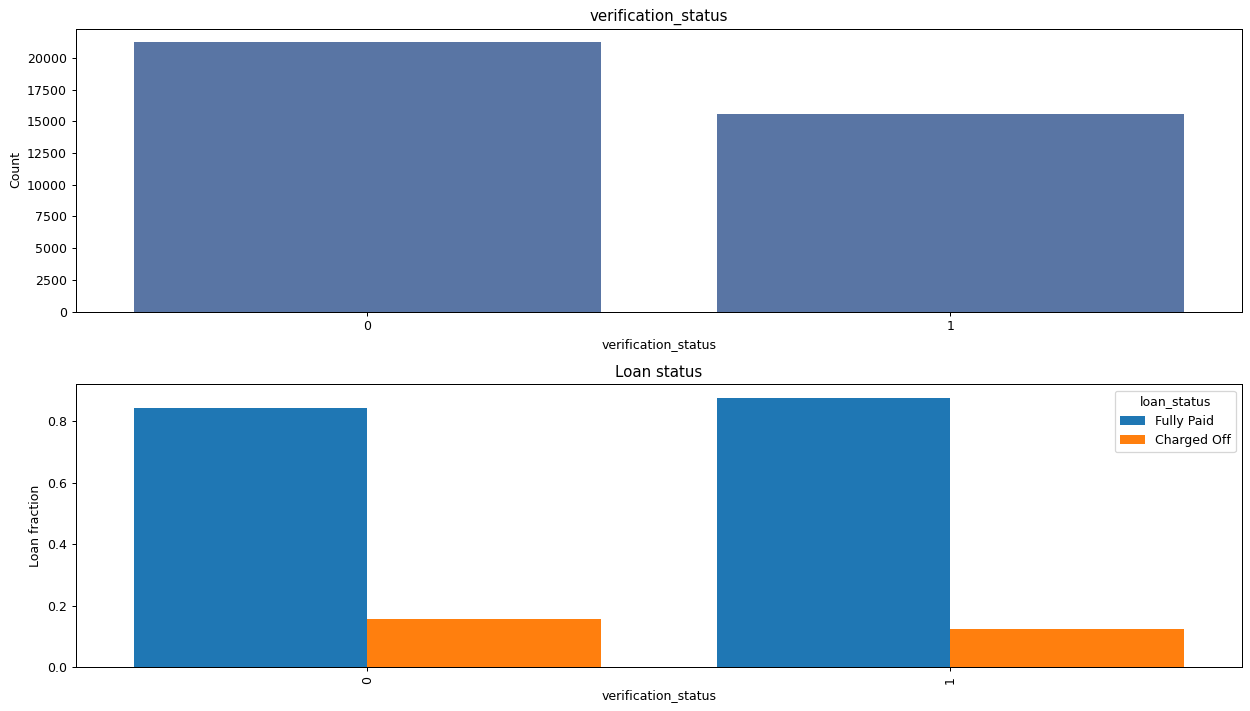

In [34]:
df.verification_status = df.verification_status.map(lambda x: 1 if x == 'Not Verified' else 0)
visualize_feature('verification_status', False)

#The applicants whose source was verified are more likely to be Charged Off which is a little bit surprising.

## Derived features 13 & 14: Issue month & Issue year from Issue date
People tend to borrow much more toward the end of the year. It looks people who borrowed in certain months may have a relatively higher chance of default.
The number of borrowers is increasing very rapidly over the years.

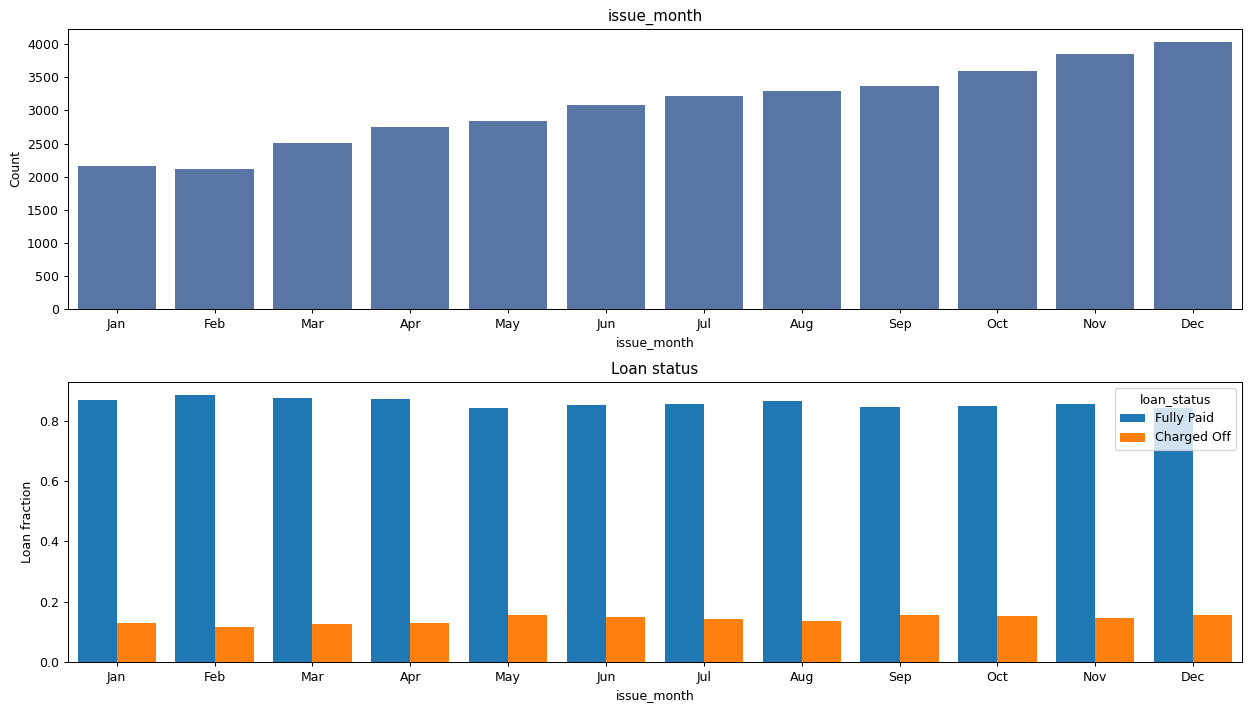

In [35]:
#13. Feature: issue_d
#The ‘issude_d’ feature is the string. Since we are dealing with 
#different years of data and keep our model independent of year,  only 
#extract month and then convert them into categories.

df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')

month_ord =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']



f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,8), dpi=90)       
sns.countplot(df['issue_month'],order= month_ord, color='#5975A4', saturation=1, ax=ax1)
ax1.set_xlabel('issue_month')
ax1.set_ylabel('Count')
ax1.set_title('issue_month')
plt.xticks(rotation = 0)           
data = df.groupby('issue_month')['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
sns.barplot(x = 'issue_month', y = 'proportion',order = month_ord, hue= "loan_status", data = data, saturation=1, ax=ax2)
ax2.set_ylabel('Loan fraction')
ax2.set_title('Loan status')
#plt.xticks(rotation = 0)
ax2.set_xlabel('issue_month')    
plt.tight_layout()


#The loan are issued more towards year end and these people are more likely to be charged off comparatively.

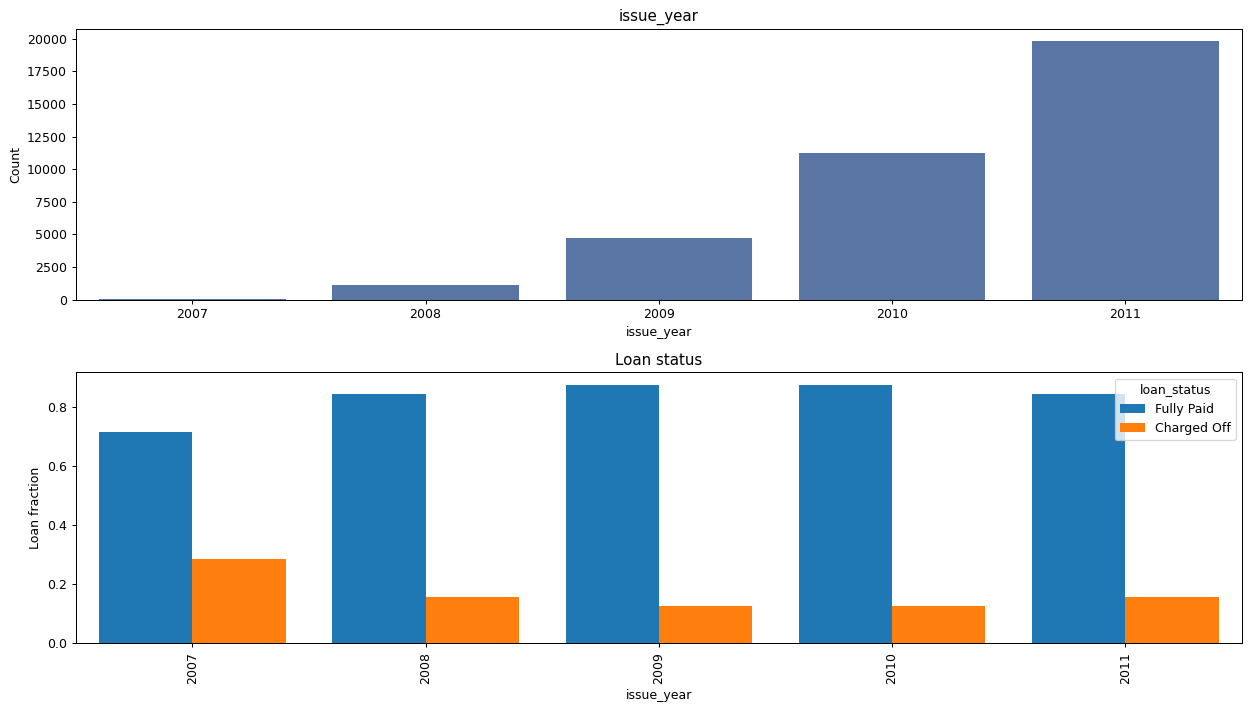

In [36]:
#14. Feature:issue_d
# Year is also extracted from the date string.

df['issue_year'] = pd.to_datetime(df['issue_d'], format = '%b-%y').dt.year
visualize_feature('issue_year', False)

# The number of borrowers is increasing very rapidly over the years. The charge Off fraction was significant in 
# year 2007 decreasing and then again increased in year 2011.


## Feature 15: Purpose
The majority of the loans are for debit consolidation. It looks like purpose can be a discriminatory feature. For example, people who borrowed loans for small business are more likely to be defaulters than the applicants who borrowed a loan for cars.

In [37]:
#15. Feature:purpose

df.purpose.value_counts()

debt_consolidation    17381
credit_card            4800
other                  3606
home_improvement       2737
major_purchase         2060
small_business         1656
car                    1431
wedding                 894
medical                 647
moving                  543
house                   349
vacation                342
educational             297
renewable_energy         94
Name: purpose, dtype: int64

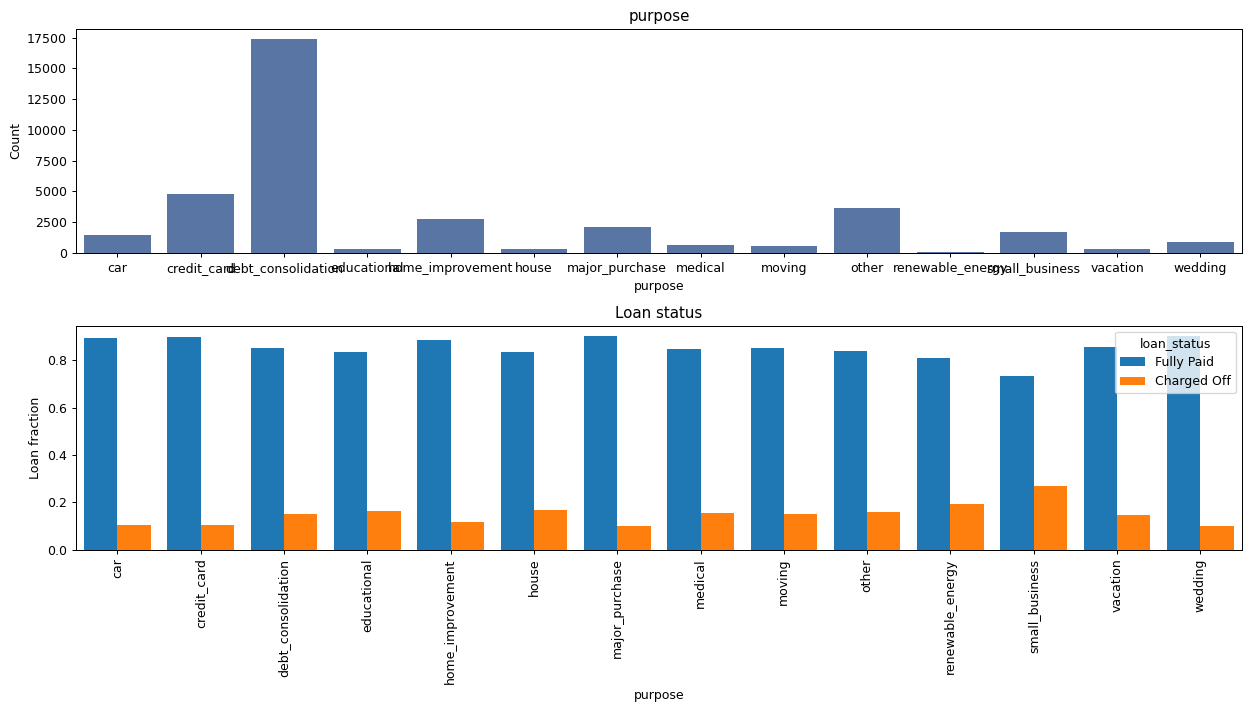

In [38]:
visualize_feature("purpose", False)

#The majority of people tale loan for debt_consolidation and also have a significant Charged Off fraction.
#The Charge Off fraction is highest in the small business category.

## Feature 16: Address state
The number of applicants from CA and NY are quite high and they also have a fairly large amount of defaulters. States like FL and NJ may need additional checks as they exhibit a high default rate and a high number of loans. While a few other states have a high default rate, the number of loans is not significant to conclude anything.

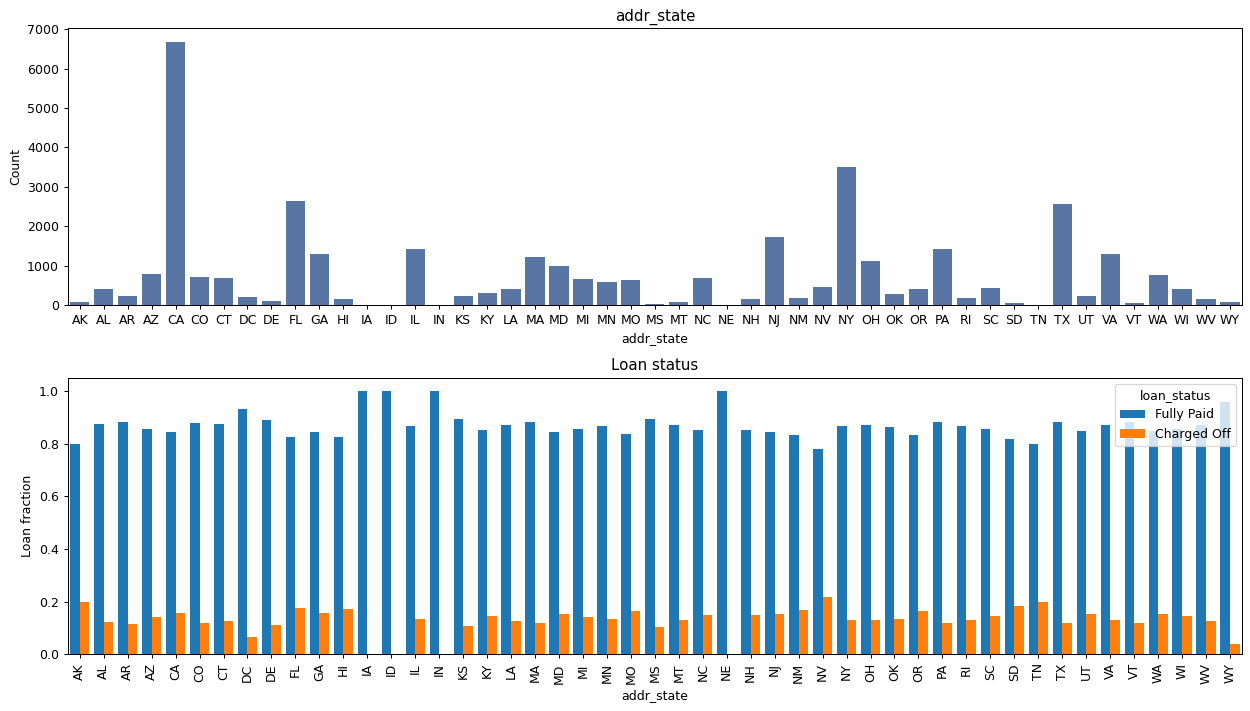

In [39]:
#16.Feature: addr_state
    
visualize_feature('addr_state', False)

#This is an interesting feature.The maximum loans are granted to CA and the defaulter ratio is also highest. 
#The other states with high demand and defaulter ratio are NY and FL. 

## Feature 17: Debt to income ratio
Higher debt to income ratio may be indicative of higher chance of default.

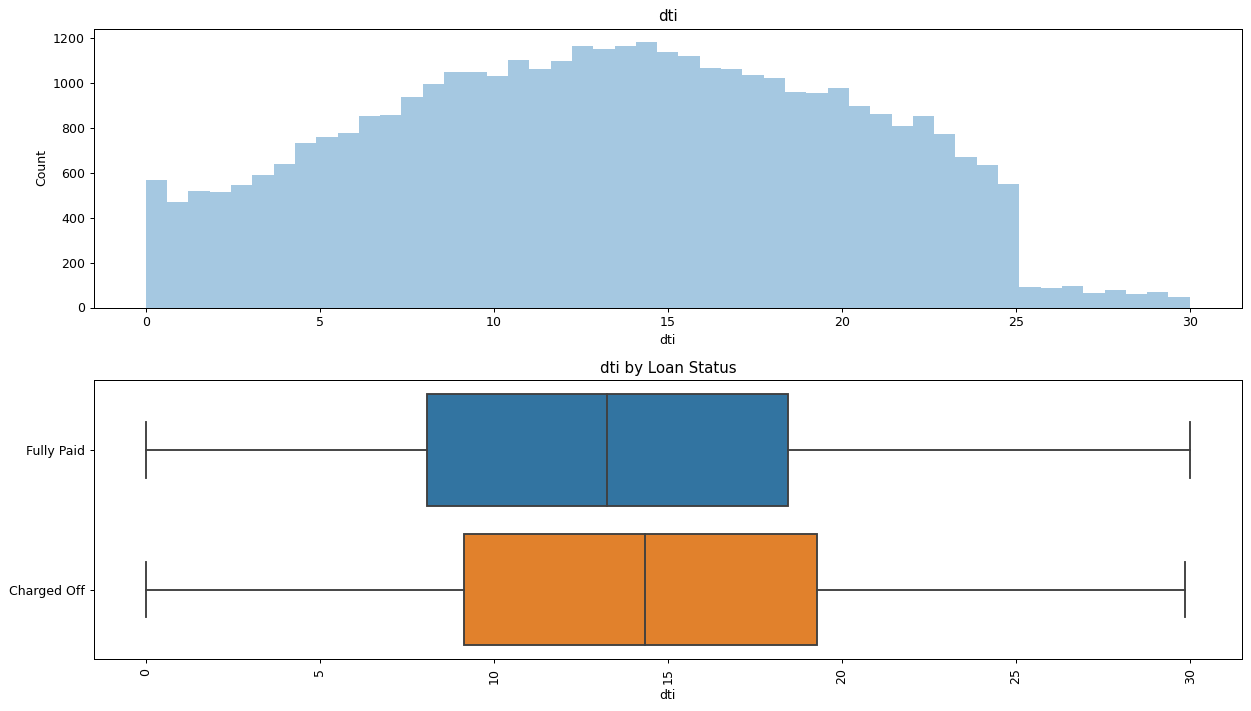

In [40]:
#17. Feature: dti

visualize_feature("dti", True)
# Higher dti may be indicative of charge offs.

## Feature 18: Delinquency in last 2 years
Higher number of delinquencies seem to relate to higher incidences of default.

In [41]:
#18. Feature: delinq_2yrs

df["delinq_2yrs"].value_counts()

0     32845
1      3063
2       635
3       198
4        57
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

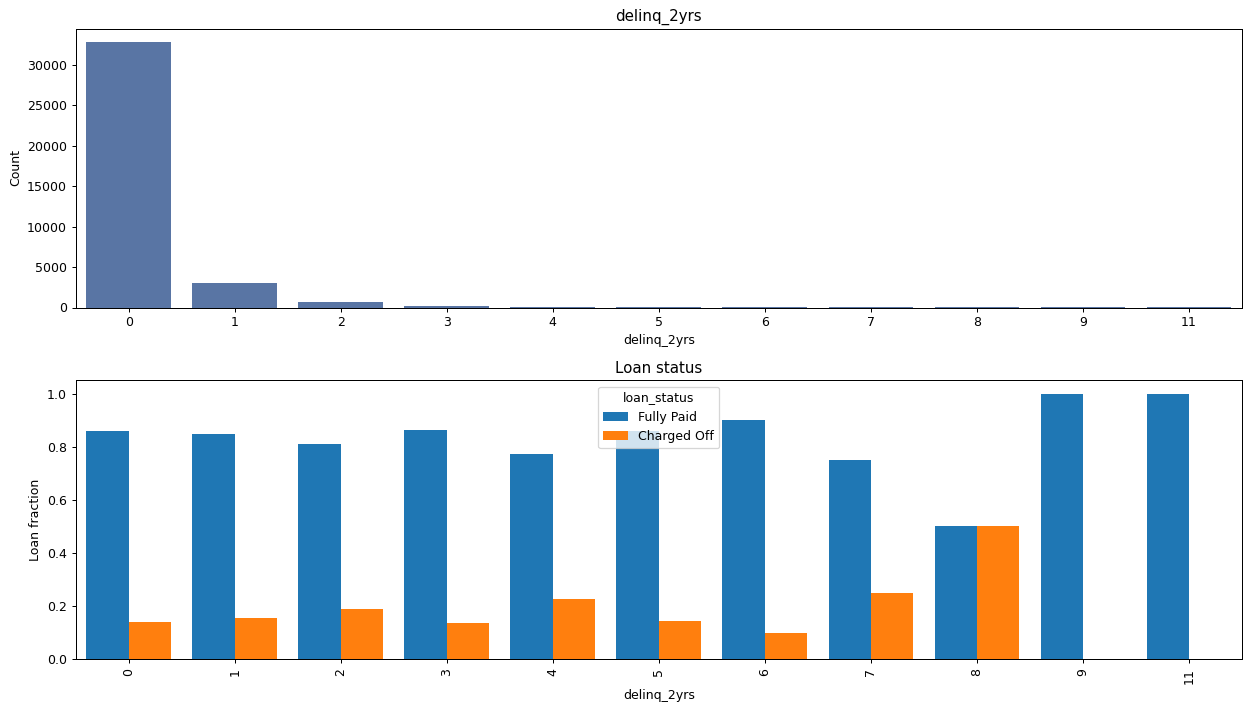

In [42]:
visualize_feature("delinq_2yrs", False)

## Feature 19: Inquiries in last 6 months
People with one or more inquiries in the last 6 months have a higher tendency to be defaulters.

In [43]:
#19. Feature:inq_last_6mths

df.inq_last_6mths.value_counts()


0    17875
1    10187
2     5401
3     2843
4      294
5      136
6       57
7       32
8       12
Name: inq_last_6mths, dtype: int64

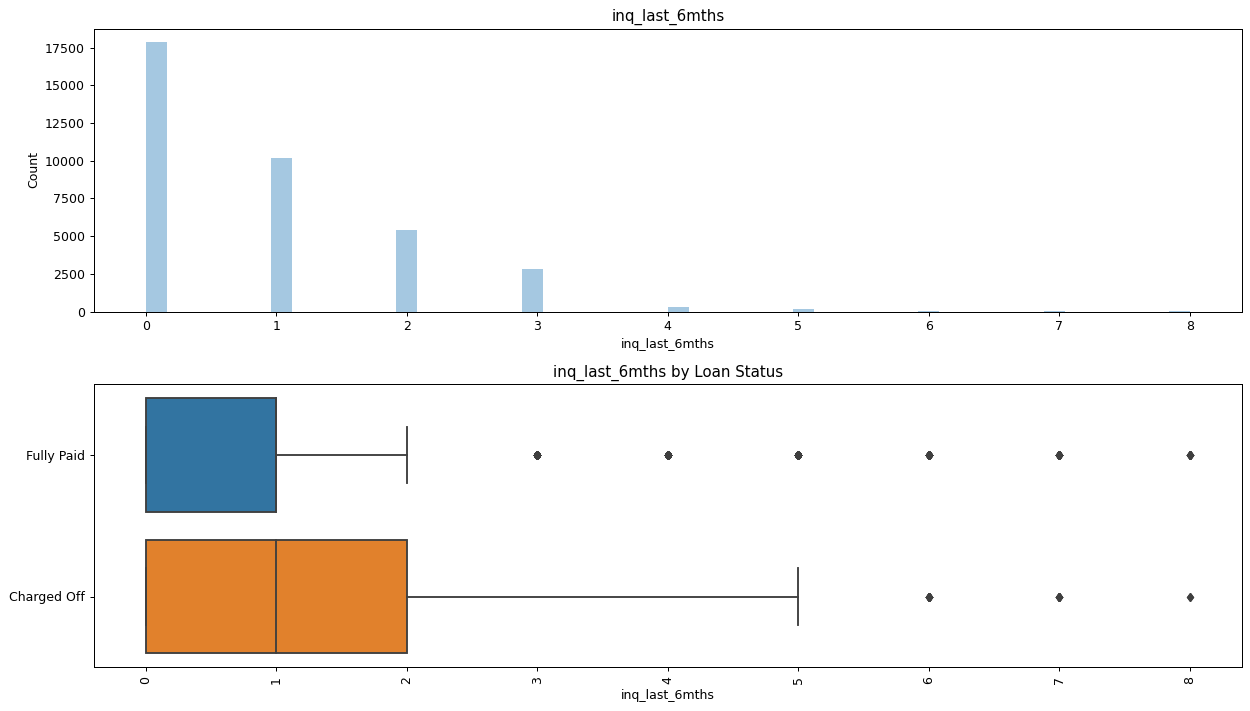

In [44]:
visualize_feature("inq_last_6mths", True)

#Those with more inquiries in the last 6 months have a higher tendency to be defaulters.

## Feature 20: Open credit lines
The number of open credit lines seems to have no effect on the loan status.

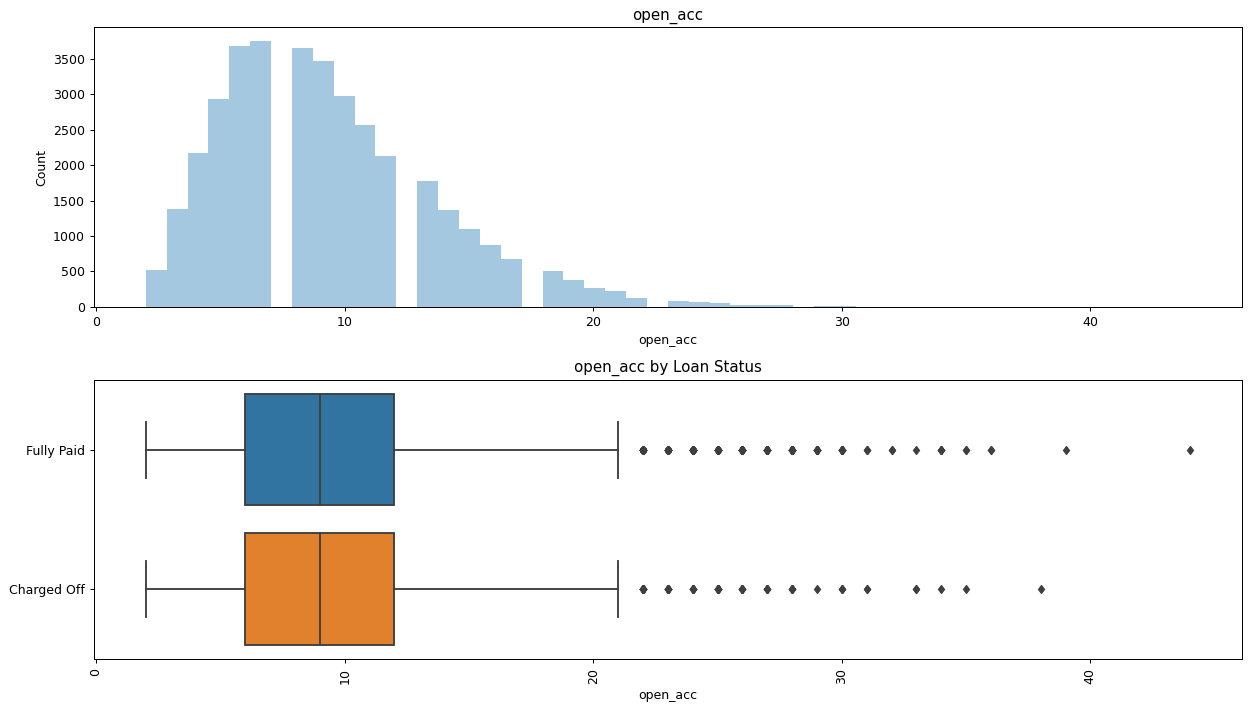

In [45]:
#20. Feature:open_acc

visualize_feature("open_acc", True)

#It seems to have no effect on the loan status.
    

## Feature 21: Derogatory public records
It seems to have no effect on the loan status in our data. This may be because the large majority of people seem to have zero public records. While these records are considered bad for credit, the nature of our data is insufficient to highlight this trend.

In [46]:
#21. Feature:pub_rec

len(df.pub_rec.value_counts())

5

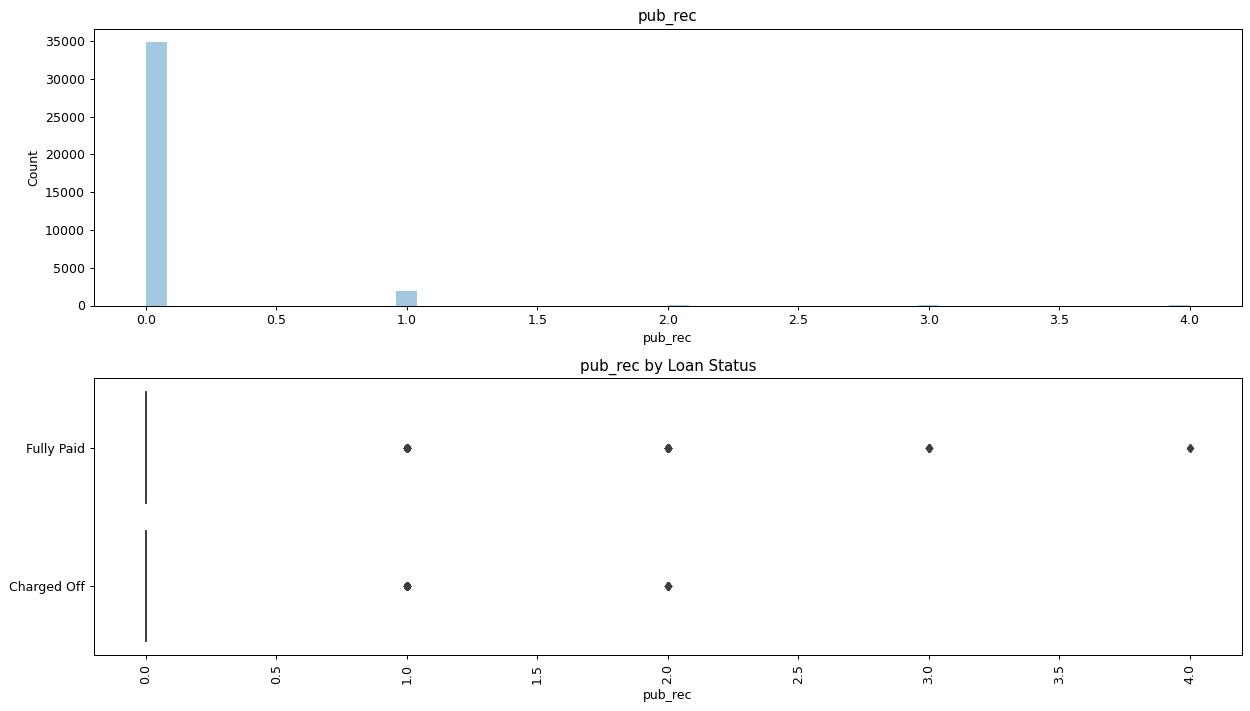

In [47]:
visualize_feature("pub_rec", True)

#Majority of people granted loan have zero pub_rec. It is difficult to infer the effect on Charge Off. 

## Feature 22: Total credit revolving balance
It seems to have no effect on the loan status.

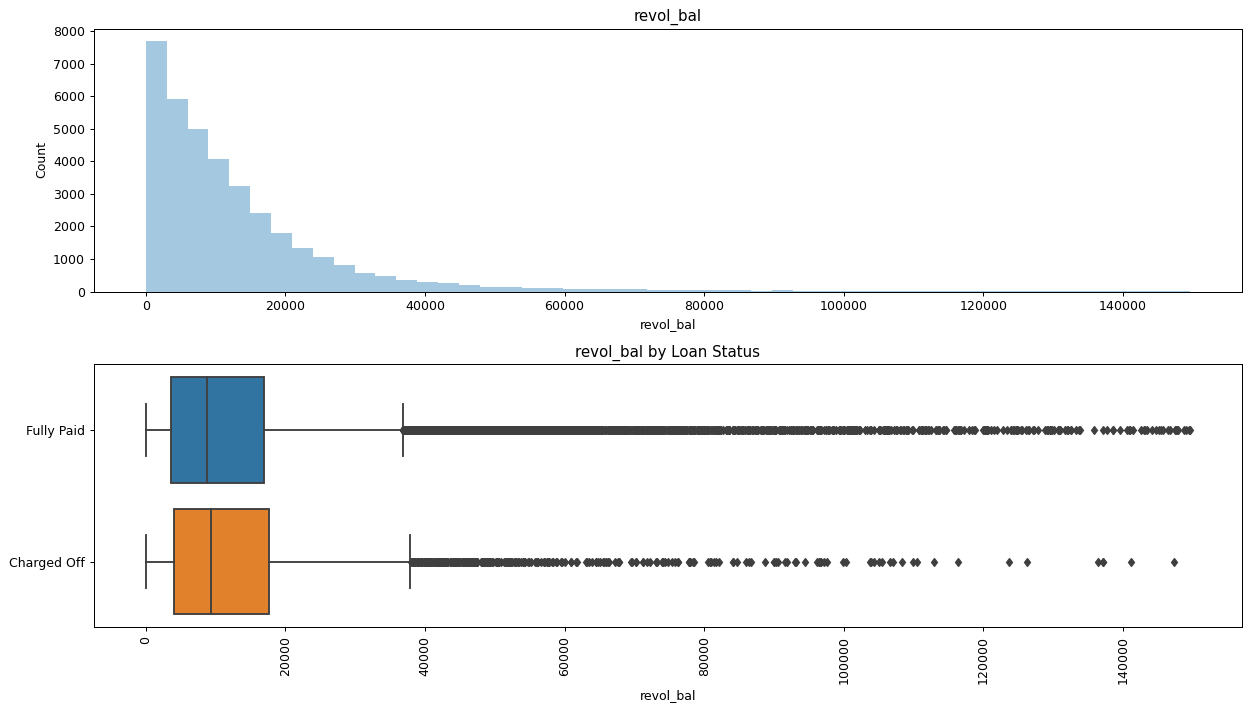

In [48]:
#22. Feature:revol_bal
    
visualize_feature("revol_bal", True)

#It seems to have no effect on the loan status.

## Feature 23: Total number of credit lines on file
It seems to have a little effect on the loan status. The median value of total credit lines for people paying back their loans is slightly higher than that of ones who default.

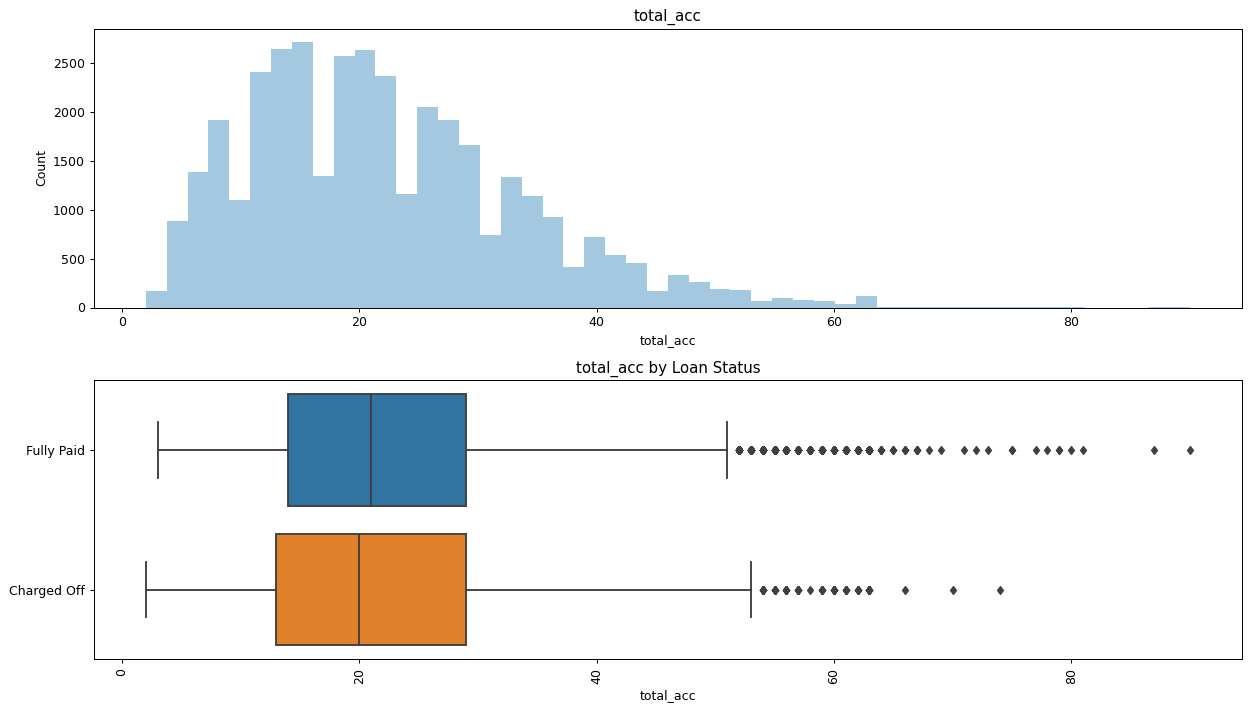

In [49]:
#23. Feature:total_acc

visualize_feature("total_acc", True)

#It seems to have little effect on the loan status. Yhe Chage Off fraction decreases slightly with total_acc.

## Feature 24: Public record of bankruptcies
As the number of records of bankruptcies increases, the chance of default increases substantially. Therefore, cases with one or more records of bankruptcy must be considered with caution.

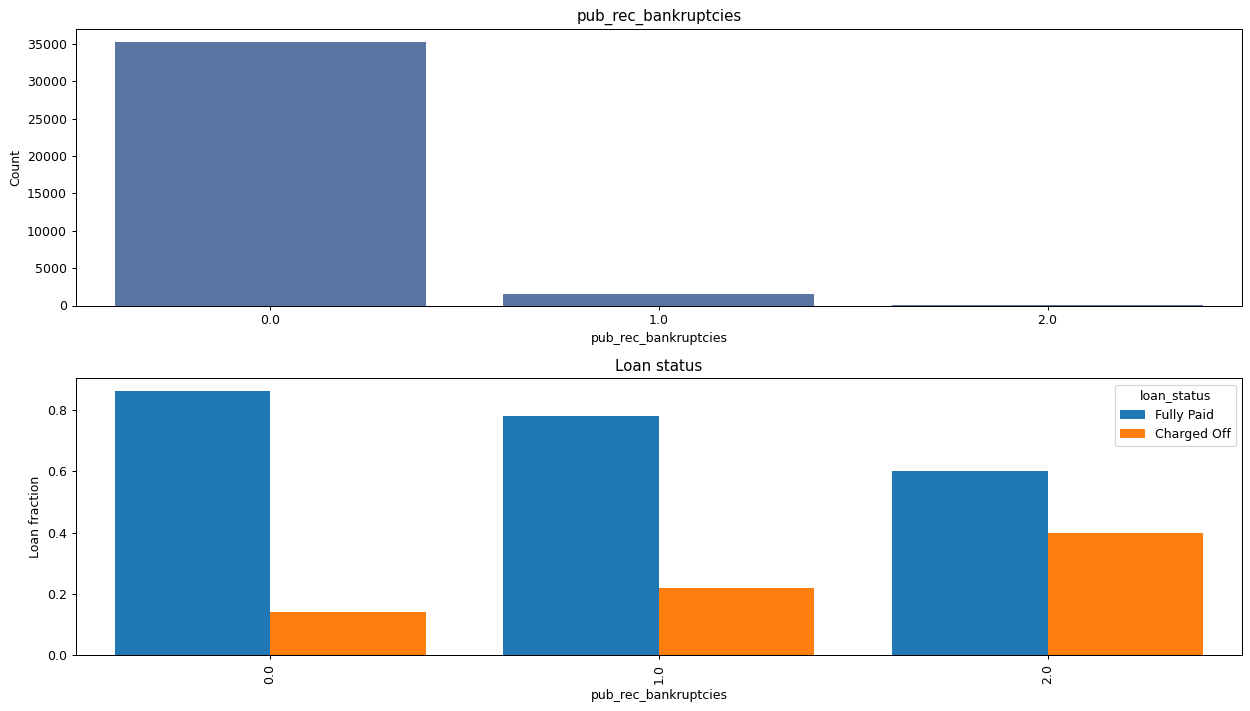

In [50]:
#24. Feature: pub_rec_bankruptcies

visualize_feature("pub_rec_bankruptcies", False)

#As the number of records of bankruptcies increases, the charge offs increase substantially.
#Therefore, cases with one or more records of bankruptcy must be considered with caution.

## Derived Features 25: Loan income ratio & 26: Installment income ratio
Both these features are similar and higher values of these indicate higher tendency of default.

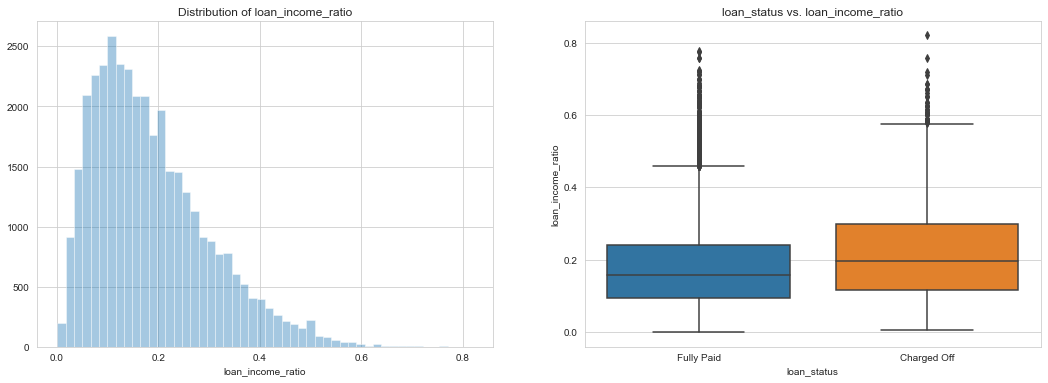

In [51]:
#25. Derived Feature: loan_income_ratio

df['loan_income_ratio'] = df['loan_amnt']/df['annual_inc']
sns.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(df.loc[df['loan_income_ratio'].notnull(), 'loan_income_ratio'], kde=False)
plt.title('Distribution of loan_income_ratio')
plt.subplot(122)
sns.boxplot(x = 'loan_status', y = 'loan_income_ratio', data = df)
plt.title('loan_status vs. loan_income_ratio')
plt.show()

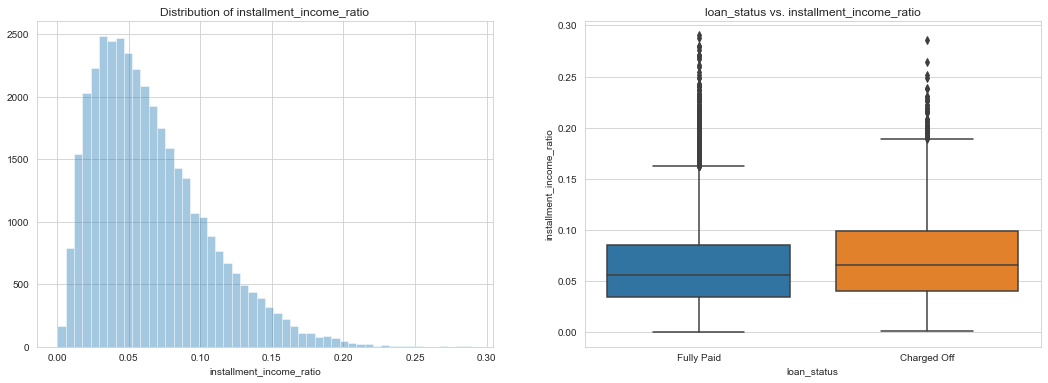

In [52]:
#26. Derived Feature: installment_income_ratio

df['installment_income_ratio'] = 12*df['installment']/df['annual_inc']
sns.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(df.loc[df['installment_income_ratio'].notnull(), 'installment_income_ratio'], kde=False)
plt.title('Distribution of installment_income_ratio')
plt.subplot(122)
sns.boxplot(x = 'loan_status', y = 'installment_income_ratio', data = df)
plt.title('loan_status vs. installment_income_ratio')
plt.show()

# Bivariate Segmented Analysis
The bivariate segmented analysis has been conducted for finding the relationship between some selected features and their effect on the loan status. 

## Loan amount vs. Funded amount
They have roughly the same values. The typical loan amount granted is the same as that which is demanded. However, in certain cases it can be lower than the demanded amount.

In [53]:
#Creating bins for continous variable category column 'loan_amnt'. 

bins = [0,5000,10000,15000,20000,25000,30000,35000]
slot = ['0-5000', '5000-10000','10000-15000','15000-20000','20000-25000', '25000-30000','30000-35000']

df['loan_amnt_discretized']= pd.cut(df['loan_amnt'],bins,labels=slot)

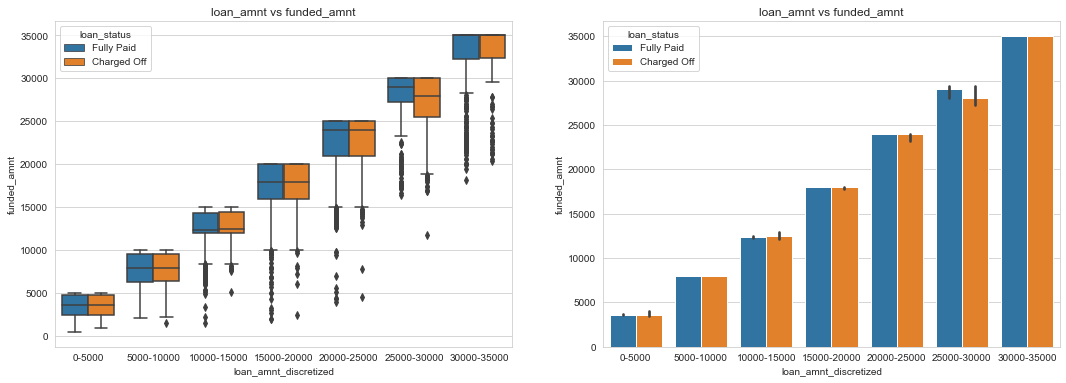

In [54]:
#loan_amnt vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='loan_amnt_discretized', y='funded_amnt',  hue='loan_status', data=df)
plt.title('loan_amnt vs funded_amnt')
plt.subplot(122)
sns.barplot(x='loan_amnt_discretized', y='funded_amnt',  hue='loan_status', data=df, estimator=np.median)
plt.title('loan_amnt vs funded_amnt')
plt.show()

## Loan amount vs. Interest rate
The interest rates increases with the loan amount. In each slab, the defaulters have typically higher interest rates.

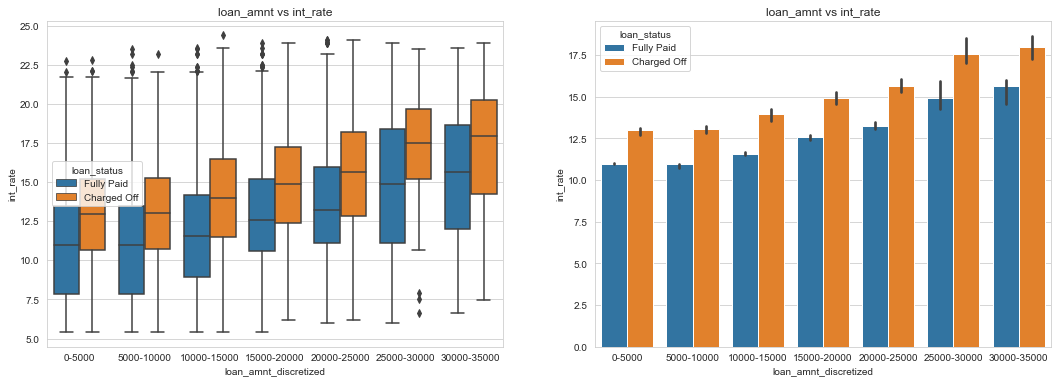

In [55]:
#loan_amnt vs int_rate
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='loan_amnt_discretized', y='int_rate', hue='loan_status', data=df)
plt.title('loan_amnt vs int_rate')
plt.subplot(122)
sns.barplot(x='loan_amnt_discretized', y='int_rate', hue='loan_status', data=df, estimator=np.median)
plt.title('loan_amnt vs int_rate')
plt.show()

## Loan status vs. Interest rate
There is a higher incidence of default amongst those paying higher interest rates.

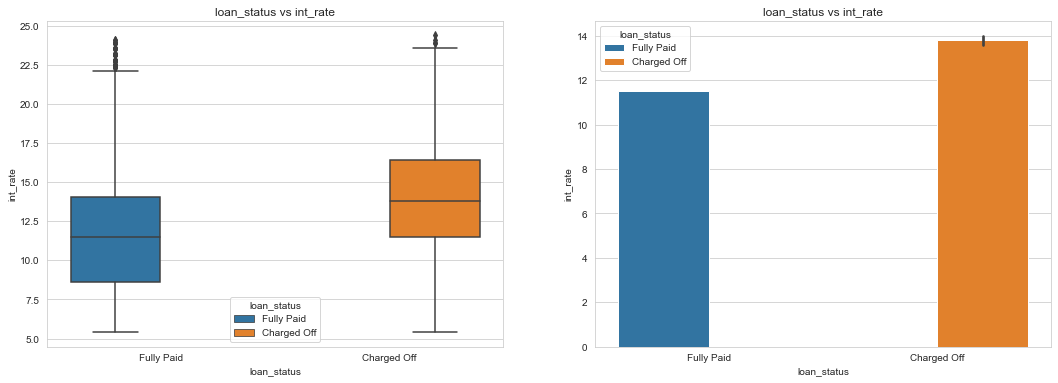

In [56]:
#loan_status vs int_rate
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='loan_status', y='int_rate',  hue='loan_status', data=df)
plt.title('loan_status vs int_rate')
plt.subplot(122)
sns.barplot(x='loan_status', y='int_rate',  hue='loan_status', data=df, estimator=np.median)
plt.title('loan_status vs int_rate')
plt.show()

## Grade vs Interest rate
The grades appear to be a guiding factor for interest rates. The lower grades have the highest interest rates. The graph of sub-grades vs. interest rate turns out to be similar, but is omitted for clarity.

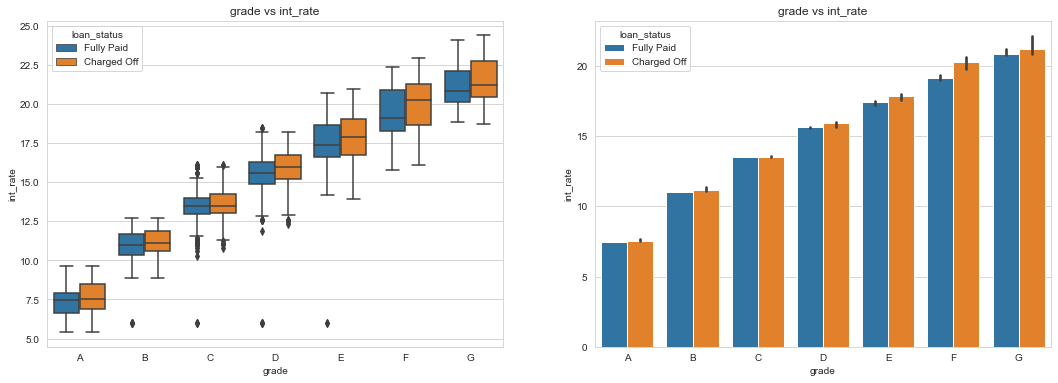

In [57]:
#grade vs int_rate
grade_ord = df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', order = grade_ord, hue='loan_status', data=df)
plt.title('grade vs int_rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', order = grade_ord, hue='loan_status', data=df, estimator=np.median)
plt.title('grade vs int_rate')
plt.show()

## Term vs. Funded Amount
The funded amount is nearly twice for the 60 month term.

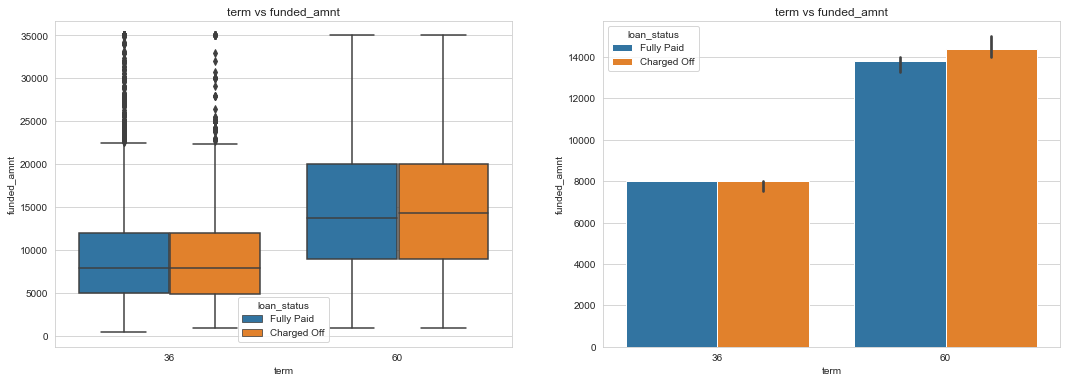

In [58]:
#term vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='term', y='funded_amnt',  hue='loan_status', data=df)
plt.title('term vs funded_amnt')
plt.subplot(122)
sns.barplot(x='term', y='funded_amnt',  hue='loan_status', data=df, estimator=np.median)
plt.title('term vs funded_amnt')
plt.show()

## Term vs. Interest rate
The interest rate is higher for long term loans. Higher interest rates seem to be positively correlated with default.

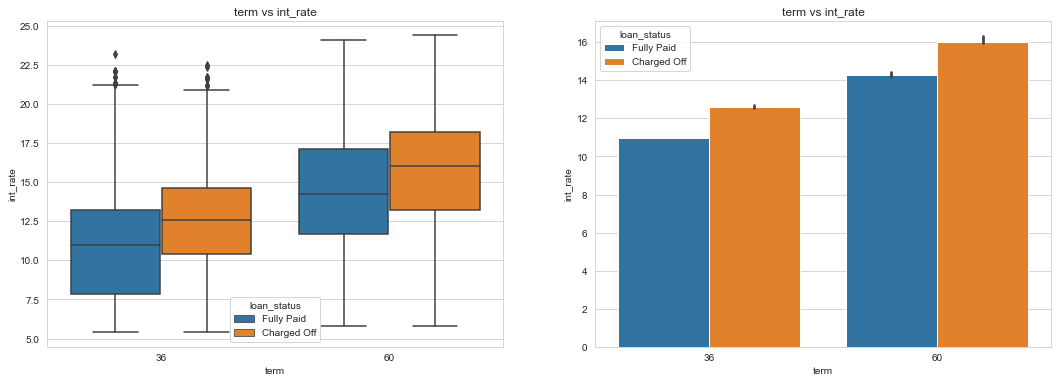

In [59]:
#term vs int_rate
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate',  hue='loan_status', data=df)
plt.title('term vs int_rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate',  hue='loan_status', data=df, estimator=np.median)
plt.title('term vs int_rate')
plt.show()

## Grade vs. Loan income ratio
Higher loan income ratios correspond to lower grades. In each grade, the loan income ratio for defaulters is also higher than that for the ones who completed payment.

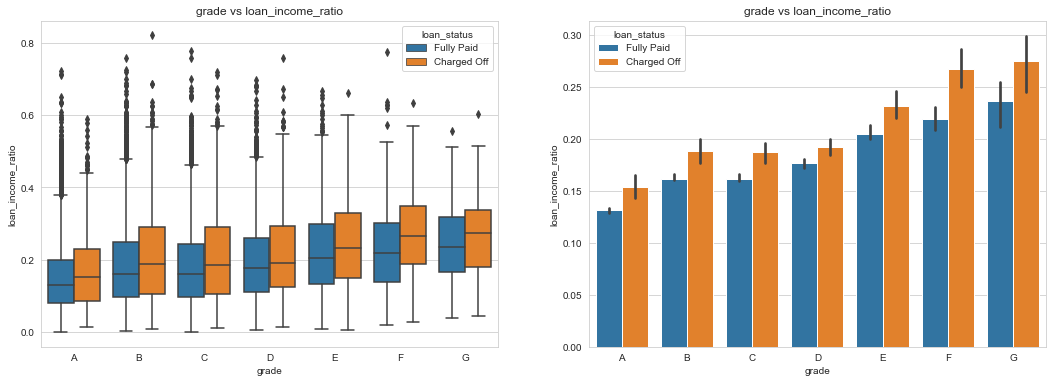

In [60]:
#grade vs loan_income_ratio
grade_ord = df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_income_ratio', order = grade_ord, hue='loan_status', data=df)
plt.title('grade vs loan_income_ratio')
plt.subplot(122)
sns.barplot(x='grade', y='loan_income_ratio', order = grade_ord, hue='loan_status', data=df, estimator=np.median)
plt.title('grade vs loan_income_ratio')
plt.show()

## Grade vs. Installment income ratio
This exhibits a similar trend to grade vs. loan income ratio described above.

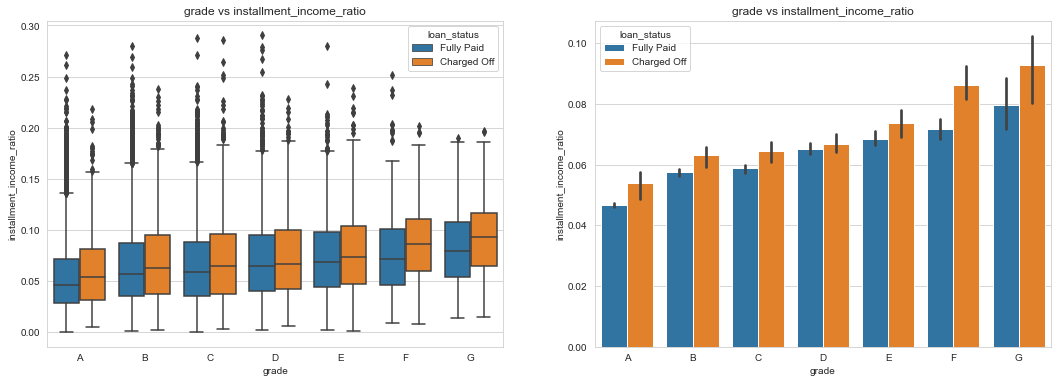

In [61]:
#grade vs installment_income_ratio
grade_ord = df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='grade', y='installment_income_ratio', order = grade_ord,hue='loan_status', data=df)
plt.title('grade vs installment_income_ratio')
plt.subplot(122)
sns.barplot(x='grade', y='installment_income_ratio', order = grade_ord,hue='loan_status', data=df, estimator=np.median)
plt.title('grade vs installment_income_ratio')
plt.show()

## Inquiries in last 6 months vs. funded amount
We notice that 5 or more inquiries in last 6 months are associated with typically higher funded amounts and a higher rate of default.

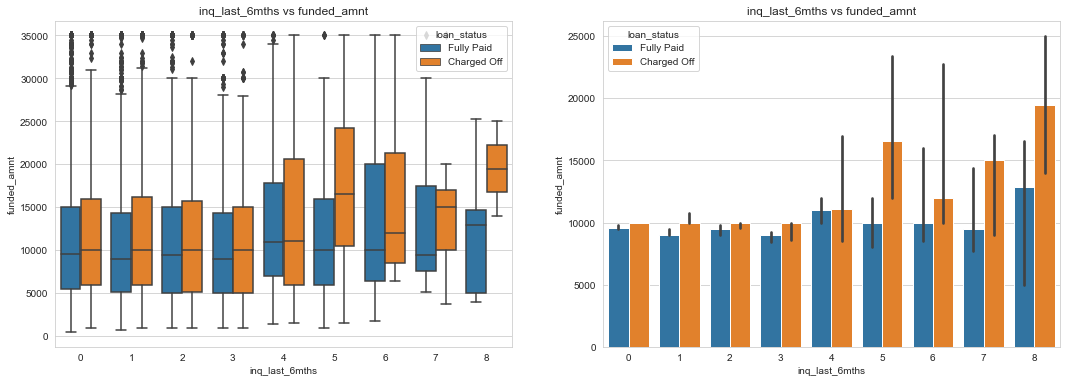

In [62]:
#inq_last_6mths vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='inq_last_6mths', y='funded_amnt', hue='loan_status', data=df)
plt.title('inq_last_6mths vs funded_amnt')
plt.subplot(122)
sns.barplot(x='inq_last_6mths', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('inq_last_6mths vs funded_amnt')
plt.show()

## Derogatory public records vs. Funded amount
Cases with lower number of derogatory public records have been granted more funds. The instances of default also rise sharply with 1 and 2 derogatory records. Cases with 3 and 4 have very few instances to identify trends and perhaps additional checks were taken in those cases.

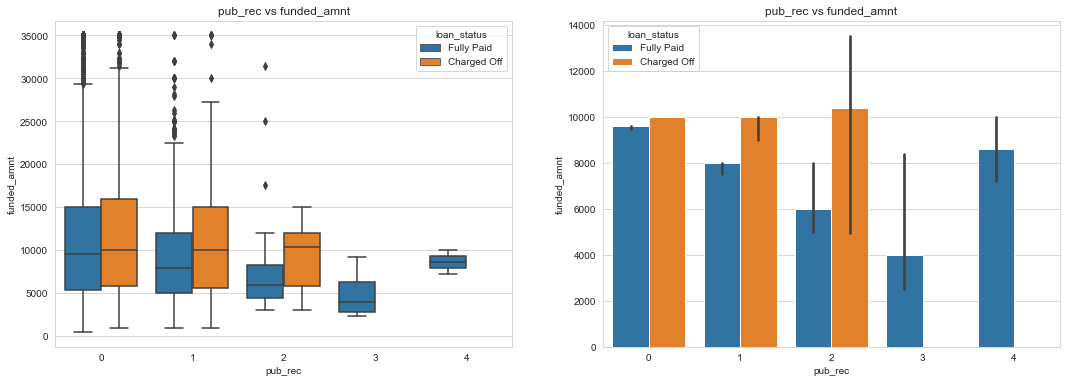

In [63]:
#pub_rec vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='pub_rec', y='funded_amnt', hue='loan_status', data=df)
plt.title('pub_rec vs funded_amnt')
plt.subplot(122)
sns.barplot(x='pub_rec', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('pub_rec vs funded_amnt')
plt.show()

## Public record bankruptcies vs. funded amount
This has a similar trend to derogatory public records vs. Funded amount. We can observe a growing risk of default with one or more bankruptcy records.

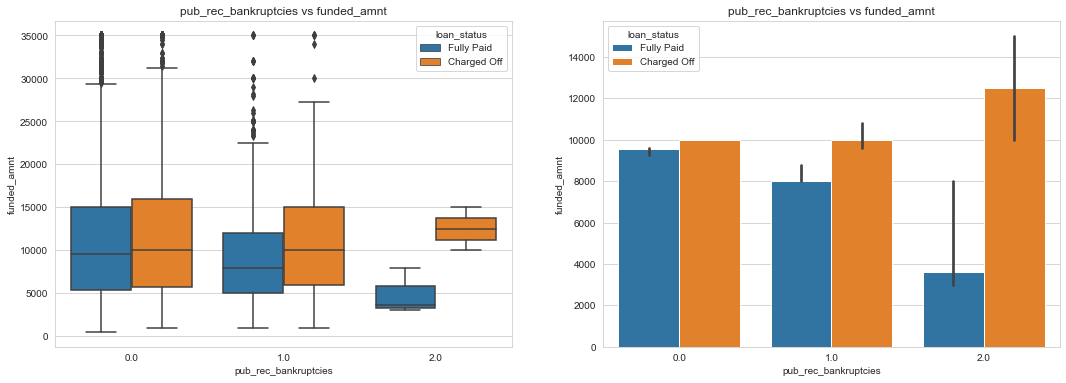

In [64]:
#pub_rec_bankruptcies vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='pub_rec_bankruptcies', y='funded_amnt', hue='loan_status', data=df)
plt.title('pub_rec_bankruptcies vs funded_amnt')
plt.subplot(122)
sns.barplot(x='pub_rec_bankruptcies', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('pub_rec_bankruptcies vs funded_amnt')
plt.show()

## Verification status vs. Funded amount
Verified loans typically have a higher amount, but surprisingly also have a slightly higher chance of default.

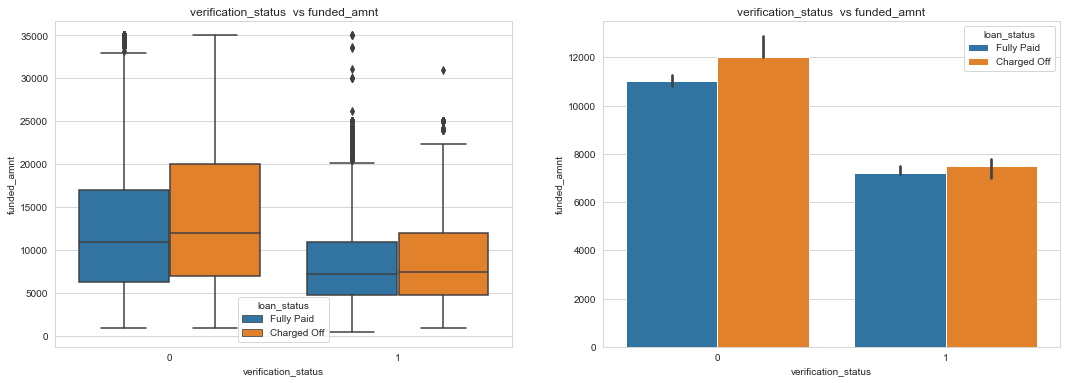

In [65]:
#verification_status vs funded_amnt
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='verification_status', y='funded_amnt', hue='loan_status', data=df)
plt.title('verification_status  vs funded_amnt')
plt.subplot(122)
sns.barplot(x='verification_status', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('verification_status  vs funded_amnt')
plt.show()

## Purpose vs. Funded amount
The highest loans are under small business, debt consolidation and credit card categories. These categories also have higher default ratio.

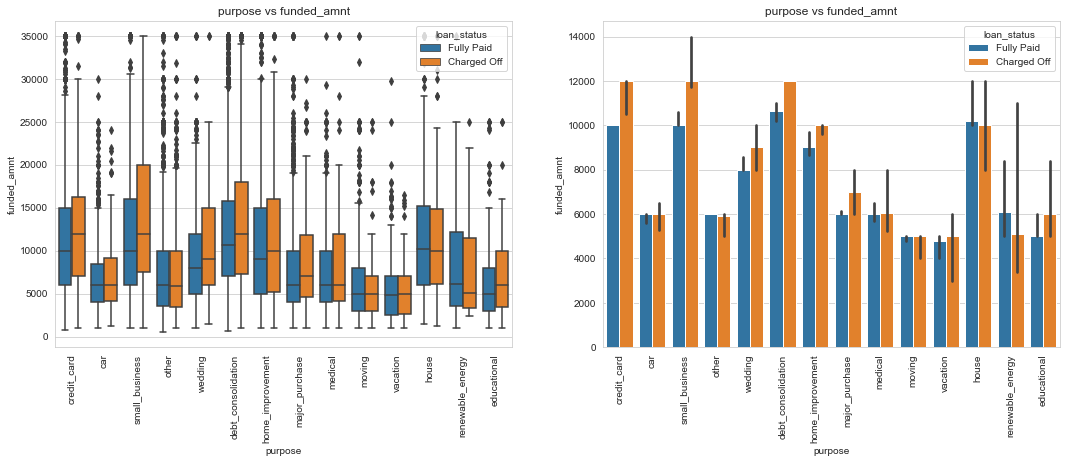

In [66]:
#purpose vs funded_amnt
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.boxplot(x='purpose', y='funded_amnt', hue='loan_status', data=df)
plt.xticks(rotation = 90)
plt.title('purpose vs funded_amnt')
plt.subplot(122)
sns.barplot(x='purpose', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.xticks(rotation = 90)
plt.title('purpose vs funded_amnt')
plt.show()

## Grade vs. Debt to Income ratio
In grades A and B, there is a lower debt to income ratio while the remaining grades have an almost uniform value.

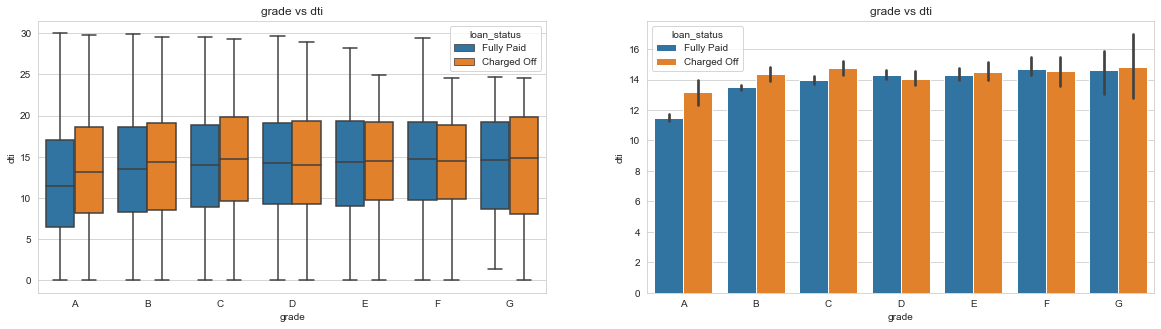

In [67]:
#grade vs dti
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', order = grade_ord, hue='loan_status', data=df)
plt.title('grade vs dti')
plt.subplot(122)
sns.barplot(x='grade', y='dti', order = grade_ord, hue='loan_status', data=df, estimator=np.median)
plt.title('grade vs dti')
plt.show()

## Loan amount vs. Annual income and Grade vs. Annual income
People with higher income are demanding loans of higher amounts which is as expected. The loans for higher annual incomes are being given lower grades.

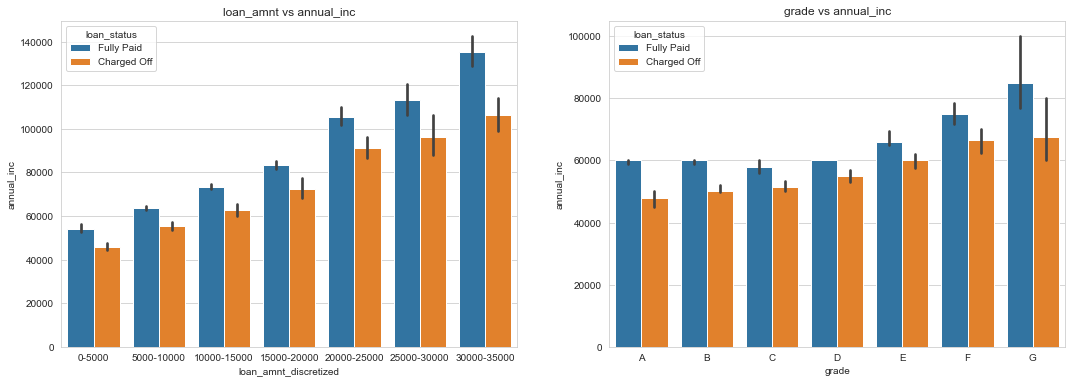

In [68]:
#Loan amount vs Annual income and Grade vs. Annual income
grade_ord = df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.barplot(x='loan_amnt_discretized', y='annual_inc', hue='loan_status', data=df)
plt.title('loan_amnt vs annual_inc')
plt.subplot(122)
sns.barplot(x='grade', y='annual_inc',order = grade_ord, hue='loan_status', data=df, estimator=np.median)
plt.title('grade vs annual_inc')
plt.show()

## Loan amount vs. Installment
The installment increases with the loan amount.

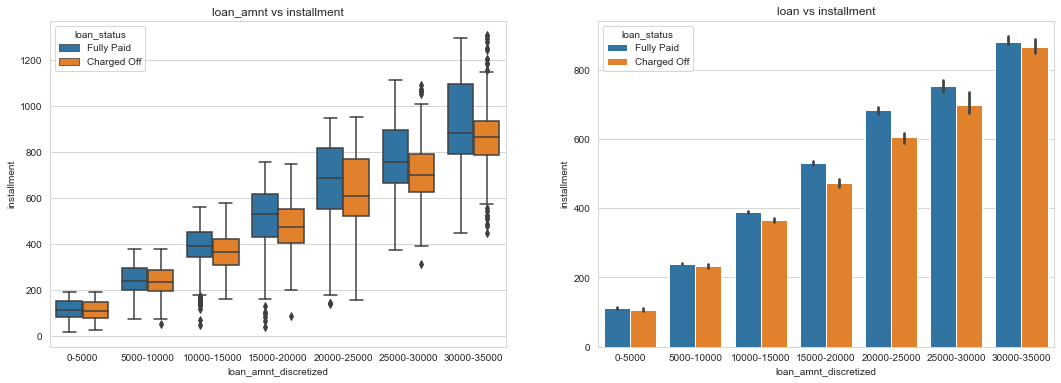

In [69]:
#loan_amnt vs installment
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='loan_amnt_discretized', y='installment', hue='loan_status', data=df)
plt.title('loan_amnt vs installment')
plt.subplot(122)
sns.barplot(x='loan_amnt_discretized', y='installment', hue='loan_status', data=df, estimator=np.median)
plt.title('loan vs installment')
plt.show()

## Issue year vs. Funded amount
The funded amount has been increasing over the years except for the initial year. The fraction of defaulters in 2007 was quite high.

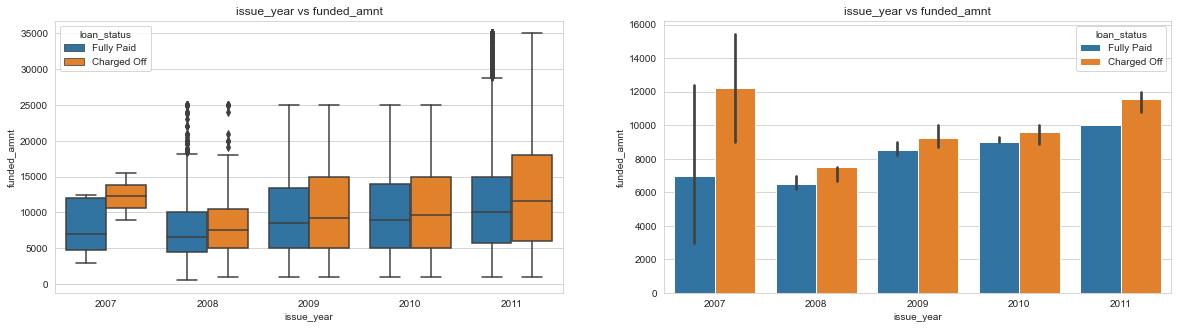

In [70]:
#issue_year vs funded_amnt
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='issue_year', y='funded_amnt', hue='loan_status', data=df)
plt.title('issue_year vs funded_amnt')
plt.subplot(122)
sns.barplot(x='issue_year', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('issue_year vs funded_amnt')
plt.show()

## Address state vs. Funded amount
The medium funding amounts seem to be quite uniform across the states with the exception of a few states. The state does not seem to be a strong indicator for predicting the loan status. The state WY seems to have an unusually large fraction of defaulters.

Text(0.5, 1.0, 'addr_state vs funded_amnt')

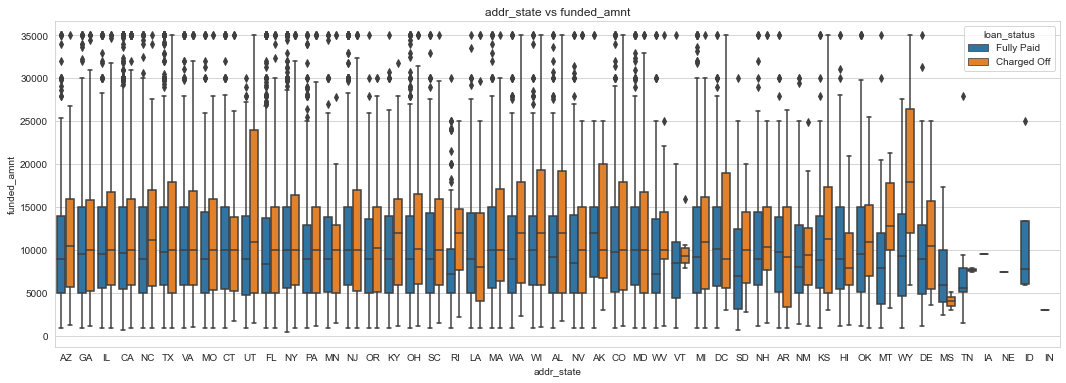

In [71]:
#addr_state vs funded_amnt
plt.figure(figsize=(18,6))

sns.boxplot(x='addr_state', y='funded_amnt', hue='loan_status', data=df)
plt.title('addr_state vs funded_amnt')


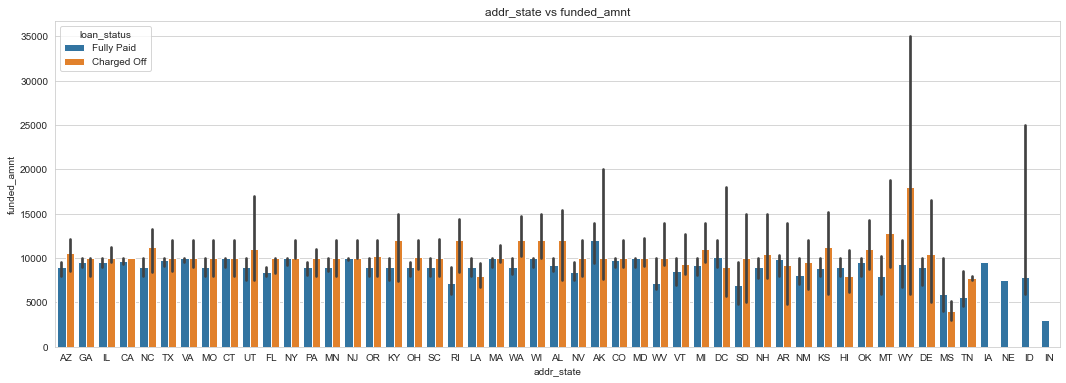

In [72]:
plt.figure(figsize=(18,6))
sns.barplot(x='addr_state', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('addr_state vs funded_amnt')
plt.show()

## Home ownership vs. Funded amount
The loans provided under mortgage and other category are higher. The default rate in mortgage and others is typically higher than that in other categories.

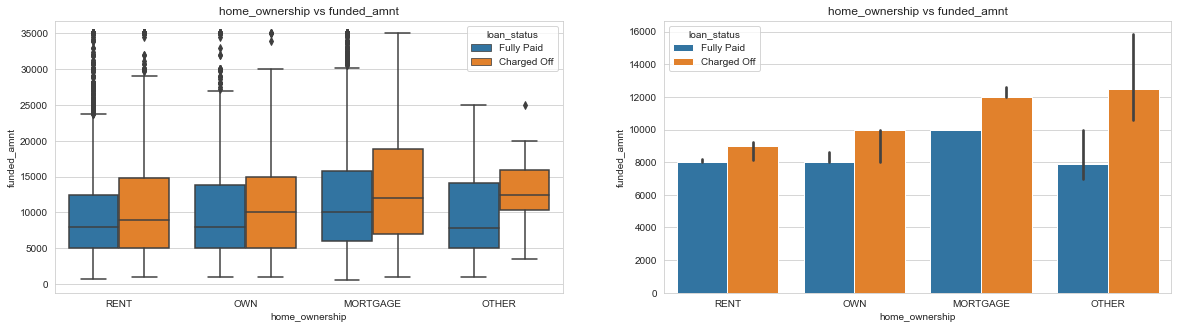

In [73]:
#home_ownership vs funded_amnt
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='funded_amnt', hue='loan_status', data=df)
plt.title('home_ownership vs funded_amnt')
plt.subplot(122)
sns.barplot(x='home_ownership', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('home_ownership vs funded_amnt')
plt.show()

### Home ownership vs Interest rate
It appears that higher interest rates are leading to higher incidences of default across all categories of ownnership.

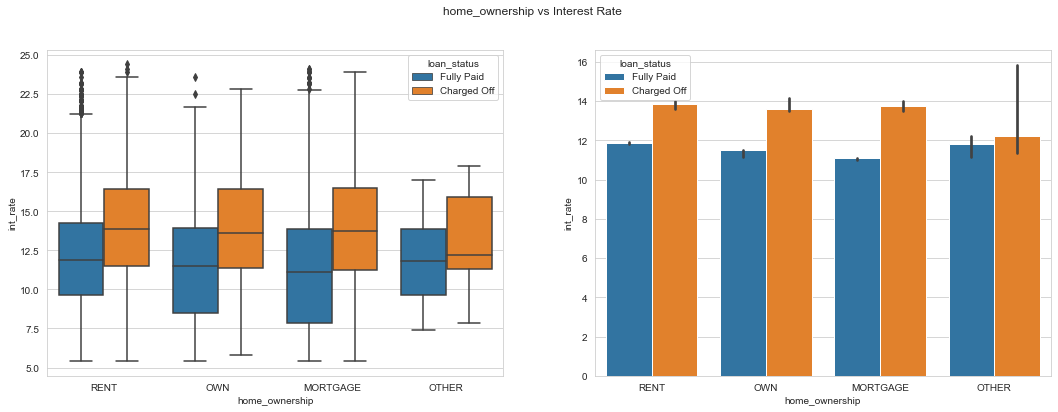

In [74]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=df)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=df, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()



## Employment length vs. Funded amount
There is a gradual increase in the amount of funding given with the employment length. Further, there is an increase in default with employment length.

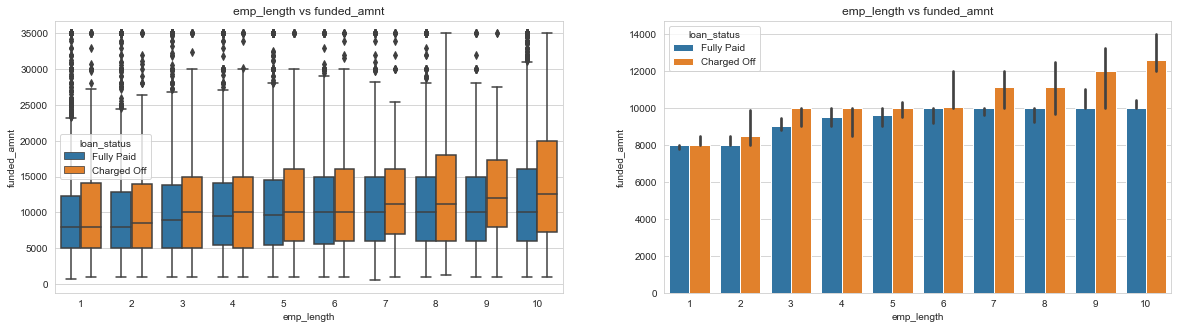

In [75]:
#emp_length vs funded_amnt
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='funded_amnt', hue='loan_status', data=df)
plt.title('emp_length vs funded_amnt')
plt.subplot(122)
sns.barplot(x='emp_length', y='funded_amnt', hue='loan_status', data=df, estimator=np.median)
plt.title('emp_length vs funded_amnt')
plt.show()

# Correlation Analysis

### Encoding the categorical features

In [76]:
#Here we encode the categorical features. In the following section:
#purpose, home_ownership, grade, sub_grade, addr_state, issue_month & loan_status:

df.loan_status = df.loan_status.astype("category",np.unique(df.loan_status)).cat.codes
df.grade = df.grade.astype("category", np.unique(df.grade)).cat.codes
df.sub_grade = df.sub_grade.astype("category",  np.unique(df.sub_grade)).cat.codes
df.purpose = df.purpose.astype("category", np.unique(df.purpose)).cat.codes
df.home_ownership = df.home_ownership.astype("category", np.unique(df.home_ownership)).cat.codes
df.addr_state = df.addr_state.astype("category",np.unique(df.addr_state)).cat.codes
df.issue_month = df.issue_month.astype("category",np.unique(df.issue_month)).cat.codes

In [77]:
# To convert the encoding of Fully Paid from 1 to 0 and that of Charge off from 0 to 1
df['loan_status'] = 1 - df['loan_status']

### Heatmap: Visualizing the correlation amongst different features is crucial to understanding the data

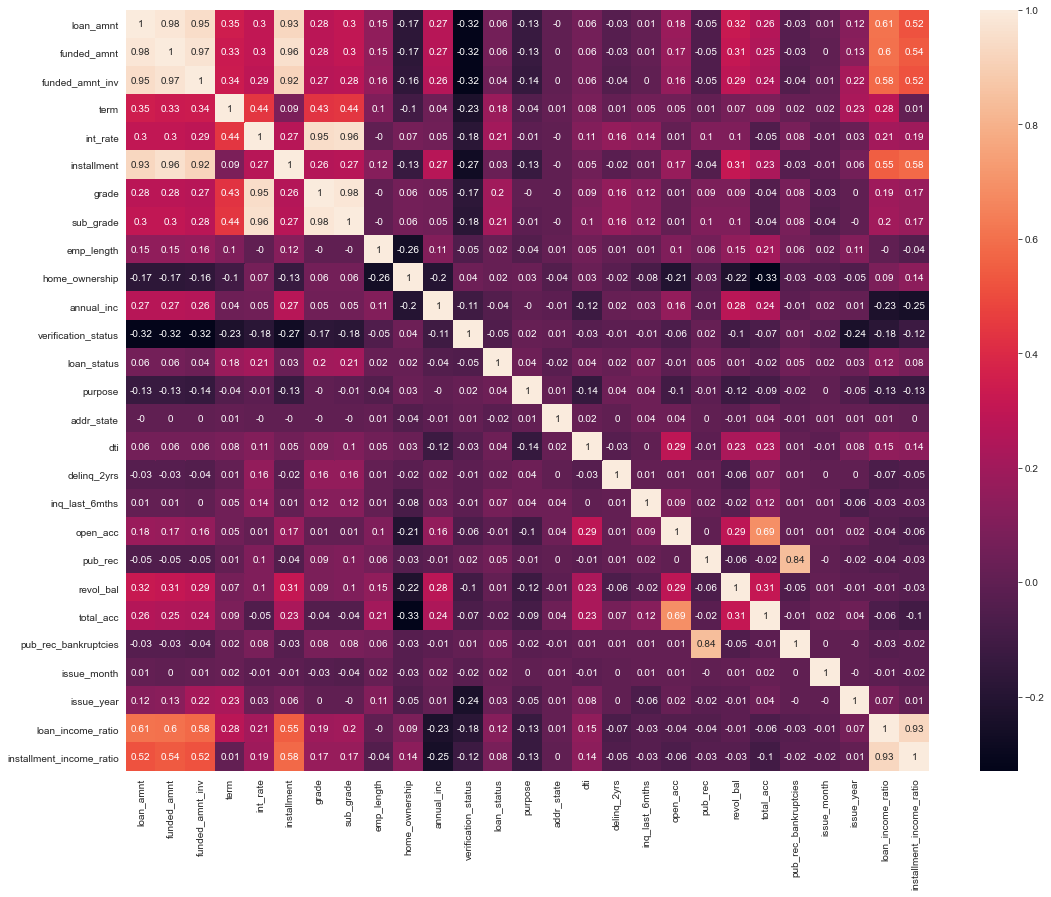

In [78]:
#Heatmap: In the plot below, the relationships among the features are shown.

#Observing the correlation amongst different features is crucial to understanding the data
#It helps us to identify good, bad and redundant features. This can be used for feature selection. 


corr = df.corr().round(2)

plt.figure(figsize = (18, 14))
#sns.heatmap(corr)
#plt.show()
# checking correlation using heatmap
#Loading dataset
#flights = sns.load_dataset("flights")
  
#ploting the heatmap for correlation
ax = sns.heatmap(corr, annot=True)

### Identifying the features most useful in predicting the loan status
We simlpy sort the features and list them in decreasing order of correlation to the loan status.

In [79]:
#If we want to see how features are related to the target variable we
# can also write the code below to obtain the feature correlation 
#coefficients with the target variable:

corr['loan_status'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,loan_status,1.0000
1,int_rate,0.2100
2,sub_grade,0.2100
3,grade,0.2000
4,term,0.1800
5,loan_income_ratio,0.1200
6,installment_income_ratio,0.0800
7,inq_last_6mths,0.0700
8,funded_amnt,0.0600
9,loan_amnt,0.0600


### Observations regarding correlation
There are a couple of tasks involved here:
<ul>
    <li>Identifying features where the magnitude of correlation with loan status is the relatively high.</li>
    <li>Grouping features which have a high correlation amongst themselves so as to understand redundancy.</li>
</ul>

<ol>
    <li>The correlation of sub-grade, interest rate with loan status is highest (0.21) and the correlation amongst themselves is also very high (0.96). The lower values of sub-grade (E-G) indicates increased chances of default. Similarly, the high interest rate also increases the chances of default. Grade is closely related to sub grade correlation (0.98) and have similar correlation (0.20) with the loan status.</li>
    <li>The next important feature is loan term with good correlation (0.18) with the loan status. The long-term loans are more susceptible to default.</li>
    <li>The derived features loan amount to income ratio and installment to income ratio have high correlation (0.93) between them and also good correlation with (0.12 and 0.08) with the loan status. The high values of these ratio predict high chances of default.</li>
    <li>The next in the series is inquiries within last six months with correlation 0.7 with the loan status. More inquiries indicate higher chances of defaulting the loan.</li>
    <li>The correlation coefficient of the variables loan amount, funded amount invested and installment with the funded amount is very high (> 0.96) and have correlation of 0.06 with the loan status. the default is more probable with large values of these features.</li>
    <li>The correlation between the public record of bankruptcies with public record is also high (=0.84) with correlation 0.05 with loan status. A large number of public records would increase the chances of defaulting the loan.</li>
    <li>On the other side strict verification reduces the chances of default, having correlation -0.05 with loan status. This trend is surprising.</li>
    <li>The correlation magnitude with the loan status of the remaining features is comparatively less (< 0.05). These are purpose, annual income, installment, address state, home ownership etc.</li>
</ol>